In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy.stats.stats import pearsonr

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
print ('Dimension of our data set is:')
print(data.shape)
data.head(10)

Dimension of our data set is:
(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# **CLEANING DATA**

- **Separate the CarName Variable to two columns: CompanyName and CarModel**

In [6]:
#Each element of the CarName column will be split into two Strings, and we will only keep the first one

CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])

#Insert the new variable as a column in our dataset

data.insert(3, "CompanyName", CompanyName)

#Remove CarModel column

data. drop(['CarName'], axis = 1, inplace = True)

#Remove the CarID column, as it has no effect on our dataset

data.drop(['car_ID'], axis = 1, inplace = True)

data.head(10)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


- **Examining categorical variables and correcting them**

In [7]:
def get_variable_type(element):
    """Check that the columns are of continuous or categorical variable.
     The assumption is that if:
                  unique number < 20 then we assume it is categorical
                  unique number >= 20 and dtype = [int64 or float64] then we assume it's continuous"""
    if element == 0:
        return "Not Known"
    elif element < 20 and element != 0:
        return "Categorical"
    elif element >= 20 and element != 0:
        return "Continuous"
    

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Values_Unique_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix


def get_meta_data(dataframe):
    """Method to get metadata about any passed dataset"""
    metadata_matrix = pd.DataFrame({'Datatype' : dataframe.dtypes.astype(str), # column data types
                                     'Non_Null_Count' : dataframe.count(axis = 0).astype(int), 
# total number of elements in columns
                                       'Null_Count' : dataframe.isnull().sum().astype(int), 
# total null values ​​in columns
                                         'Null_Percentage' : dataframe.isnull().sum()/len(dataframe) * 100, # percentage of zero values
                                           'Values_Unique_Count' : dataframe.nunique().astype(int)}) # nombre de valeurs uniques
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix


def list_potential_categorical_type(dataframe, data):
    print("*********potential categorical data type columns*********")
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    length = len(metadata_matrix_categorical)
    if length == 0:
        print("No categorical columns in a given dataset.")
    else:
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype", "Values_Unique_Count"])
        metadata_matrix_categorical.sort_values(["Values_Unique_Count"], axis = 0, ascending = False, inplace = True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        for name in col_to_check:
            name_list.append(name)
            values_list.append(data[name].unique())
            temp = pd.DataFrame({"index" : name_list, "Values_Unique_Count" : values_list})
            metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
            metadata_matrix_categorical = pd.merge(metadata_matrix_categorical, temp, how = 'inner', on = 'index')
            display(metadata_matrix_categorical.set_index("index"))

In [8]:
metadata = get_meta_data(data)

#list_potential_categorical_type(metadata, data)

In [9]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
data = data.replace(to_replace = "maxda", value = "mazda")
data = data.replace(to_replace = "porcshce", value = "porsche")
data = data.replace(to_replace = "toyouta", value = "toyota")
data = data.replace(to_replace = "vokswagen", value = "volkswagen")
data = data.replace(to_replace = "vw", value = "volkswagen")
data = data.replace(to_replace = "nissa", value = "nissan")

In [11]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# **Exploratory of Data**
- **Dependent Variable Visualization: price**

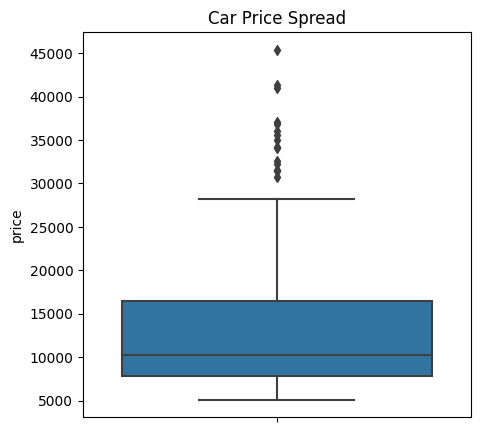

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [12]:
plt.title('Car Price Spread')
sns.boxplot(y = data.price)
plt.show()
print(data.price.describe())

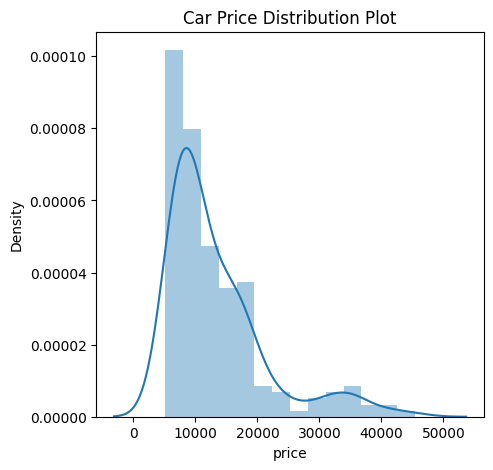

In [13]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

In [14]:
print(data.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


# **Visualization of Independent Variables:**
 - **Numerical**

In [15]:
def pairplot(x_axis, y_axis):
    sns.pairplot(data, x_vars = x_axis, y_vars = y_axis, height = 4, aspect = 1, kind = "scatter")
    plt.show()

In [16]:
y_vars = ['price']

**Price VS Wheelbase - Curbweight - Boreratio**

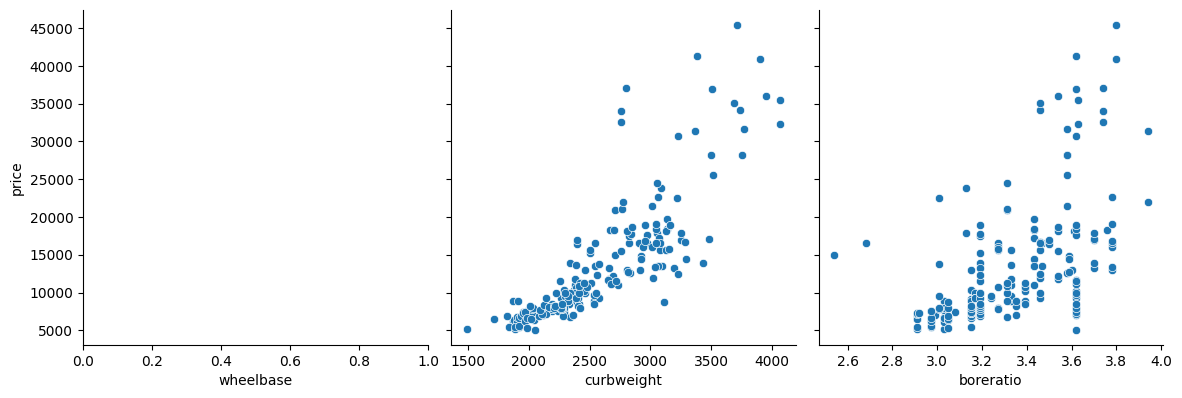

At first glance, the 3 variable are positively correlated but spread at higher values.

We can make sure of this by looking at the Coefficient of Correlation

Coefficient of Correlation between price and wheelbase: 57.78155982921503 %
Correlation Coefficient between price and curbweight: 83.53048793372967 %
Correlation Coefficient between price and boreration: 55.317323679844364 %


In [17]:
x_vars = ['wheelbase', 'curbweight', 'boreratio']
pairplot(x_vars, y_vars)
print("At first glance, the 3 variable are positively correlated but spread at higher values.")
p1 = data['wheelbase']
p2 = data['curbweight']
p3 = data['boreratio']

pearson_coeff, p_value = pearsonr(p1, data['price'])
print("\nWe can make sure of this by looking at the Coefficient of Correlation")
print("\nCoefficient of Correlation between price and wheelbase:", pearson_coeff * 100, '%')

pearson_coeff, p_value = pearsonr(p2, data['price'])
print("Correlation Coefficient between price and curbweight:", pearson_coeff * 100, '%')

pearson_coeff, p_value = pearsonr(p3, data['price'])
print("Correlation Coefficient between price and boreration:", pearson_coeff * 100, '%')

**Price VS Carlength - Carwidth - Carheigth**

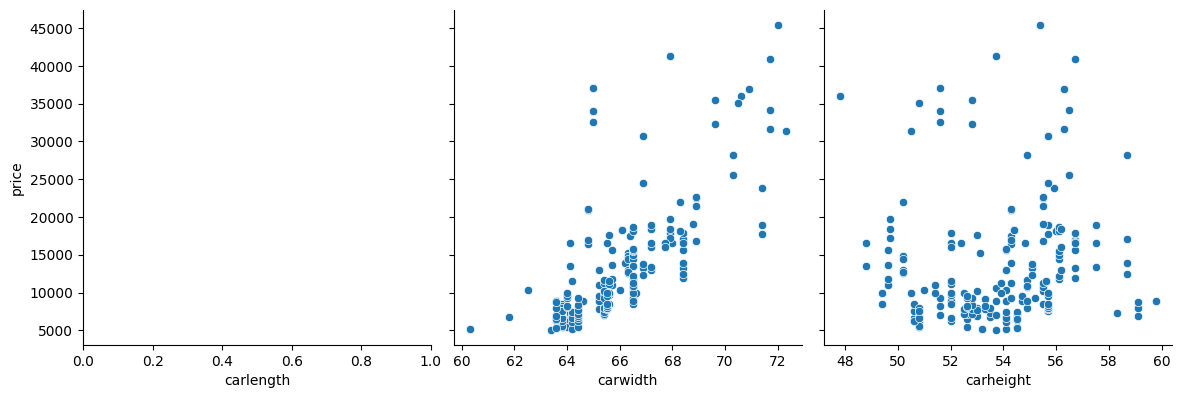

Carlength and Carweidth are more correlated than Carheigth which is more spread out but positive.

We can make sure of this by looking at the Coefficient of Correlation

Correlation Coefficient between price and Carlength: 68.2920015677962 %
Correlation Coefficient between price and Carwidth: 75.93252997415115 %

Correlation Coefficient between price and Carheight: 11.933622657049447 %


In [18]:
x_vars = ['carlength', 'carwidth', 'carheight']
pairplot(x_vars, y_vars)
print("Carlength and Carweidth are more correlated than Carheigth which is more spread out but positive.")

p1 = data['carlength']
p2 = data['carwidth']
p3 = data['carheight']

pearson_coeff, p_value = pearsonr(p1, data['price'])
print("\nWe can make sure of this by looking at the Coefficient of Correlation")
print("\nCorrelation Coefficient between price and Carlength:", pearson_coeff * 100, '%')

pearson_coeff, p_value = pearsonr(p2, data['price'])
print("Correlation Coefficient between price and Carwidth:", pearson_coeff * 100, '%')

pearson_coeff, p_value = pearsonr(p3, data['price'])
print("\nCorrelation Coefficient between price and Carheight:", pearson_coeff * 100, '%')

**Price VS Enginesize - Horsepower - Stroke**

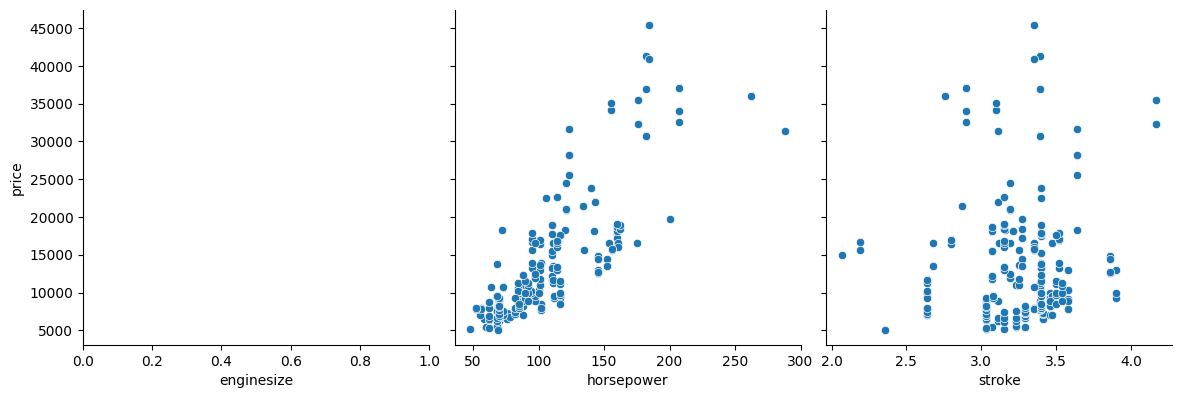

Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and enginesize:  87.41448025245117 %
Correlation coefficient between Price and horsepower:  80.81388225362215 %
Correlation coefficient between Price and stroke:  7.9443083881931 %


In [19]:
x_vars=['enginesize','horsepower','stroke']
pairplot(x_vars,y_vars)
print("Enginesize and Horsepower are positively correlated, but Stroke is more spread out (may not be related).")

p1=data['enginesize']
p2=data['horsepower']
p3=data['stroke']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and enginesize: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and horsepower: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and stroke: ',pearson_coeff*100,'%')

**Price VS Compressionratio - Peakrpm - Symboling**

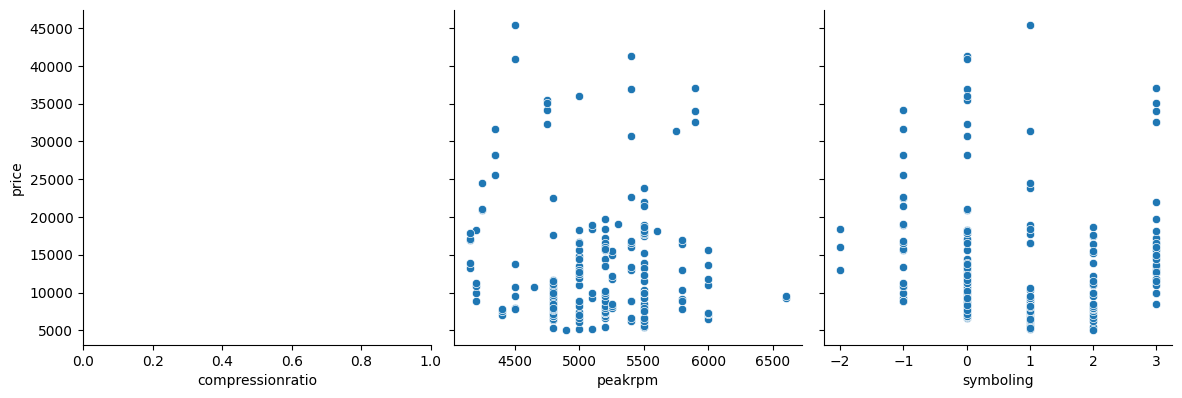

Compressionratio, Peakrpm and symboling are not correlated.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and compressionratio:  6.798350579944261 %
Correlation coefficient between Price and peakrpm:  -8.526715027785686 %
Correlation coefficient between Price and symboling:  -7.997822464270349 %


In [20]:
x_vars=['compressionratio','peakrpm',"symboling"]
pairplot(x_vars,y_vars)
print("Compressionratio, Peakrpm and symboling are not correlated.")

p1=data['compressionratio']
p2=data['peakrpm']
p3=data['symboling']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and compressionratio: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and peakrpm: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p3,data['price'])
print('Correlation coefficient between Price and symboling: ',pearson_coeff*100,'%')

**Price VS Citympg - Highwaympg**

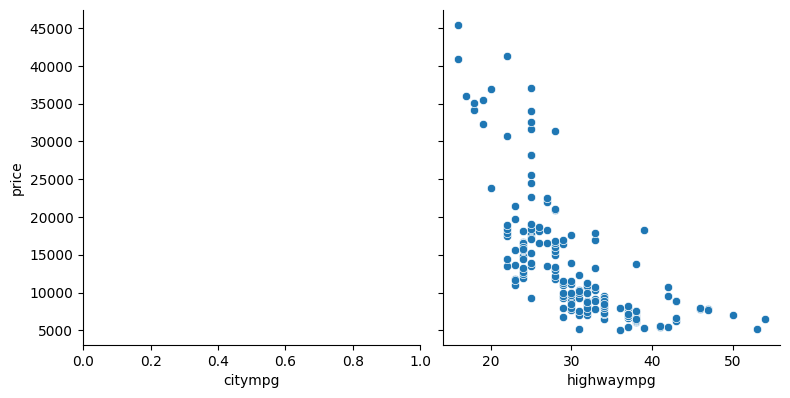

Citympg & Highwaympg are negatively correlated.
The more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.

We can make sure of this by looking at the Coefficient of Correlation

Correlation coefficient between Price and citympg:  -68.575133602704 %
Correlation coefficient between Price and highwaympg:  -69.75990916465562 %


In [21]:
x_vars=['citympg', 'highwaympg']
pairplot(x_vars,y_vars)
print('Citympg & Highwaympg are negatively correlated.\nThe more prices get lower, the higher the distances get, which means that the cheapest cars have better mileage than expensive cars.')

p1=data['citympg']
p2=data['highwaympg']

pearson_coeff, p_value = pearsonr(p1,data['price'])
print('\nWe can make sure of this by looking at the Coefficient of Correlation')
print('\nCorrelation coefficient between Price and citympg: ',pearson_coeff*100,'%')

pearson_coeff, p_value = pearsonr(p2,data['price'])
print('Correlation coefficient between Price and highwaympg: ',pearson_coeff*100,'%')

- **Checking the Multicollinearity between the correlated independent variables above and Price**

In [22]:
def heatmap(x, y, dataframe):
    sns.heatmap(dataframe.corr(), cmap = "OrRd", annot = True)
    plt.show()

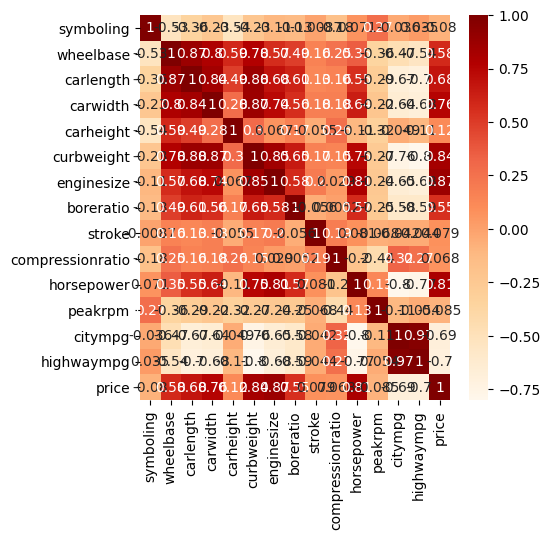

In [23]:
heatmap(20, 12, data)

**Examination of the correlation between the variables specific to the dimensions of a car i.e. weight, height etc**

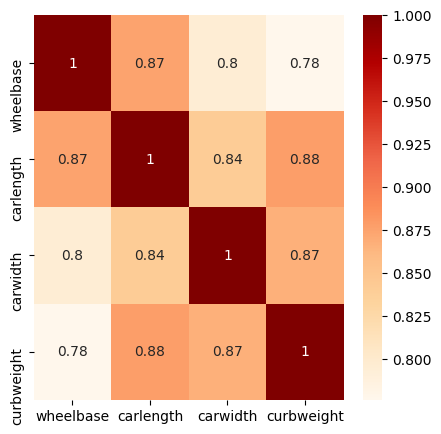

In [24]:
dimension_col_list = ['wheelbase', 'carlength', 'carwidth', 'curbweight']
heatmap(10, 10, data.filter(dimension_col_list))

**Examination of the correlation between the variables specific to the performance of a car**

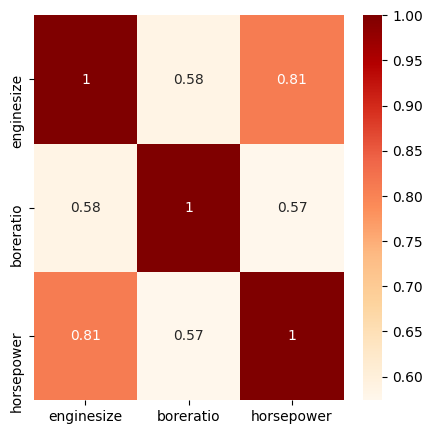

In [25]:
performance_col_list = ['enginesize', 'boreratio', 'horsepower']
heatmap(10, 10, data.filter(performance_col_list))

**Examining the correlation between citympg and highwaympg**

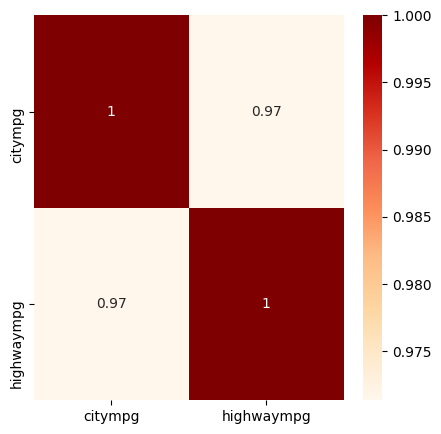

In [26]:
performance_col_list = ['citympg','highwaympg']
heatmap(10,10,data.filter(performance_col_list))

# **CATEGORICAL**
**Price VS CompanyName**

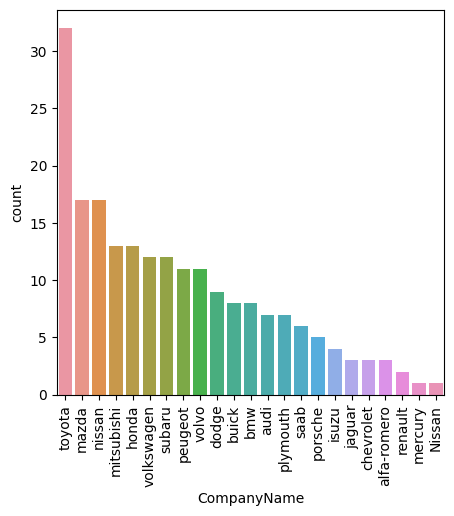

In [27]:
plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending = False).index
sns.countplot(x = 'CompanyName', data = data, order = order)
plt.show()

**Price VS fueltype**

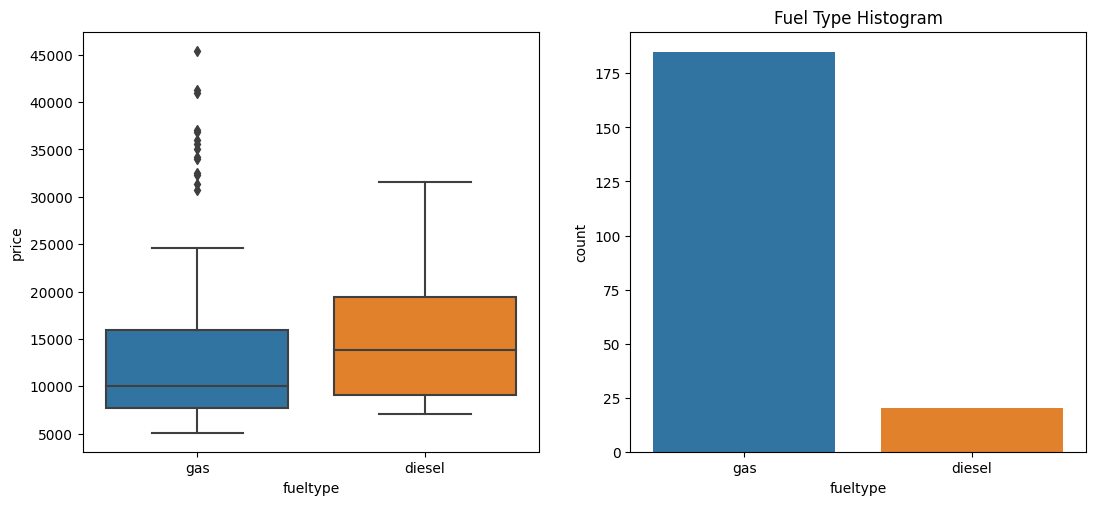

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)
plt.show()

**Price VS aspiration**

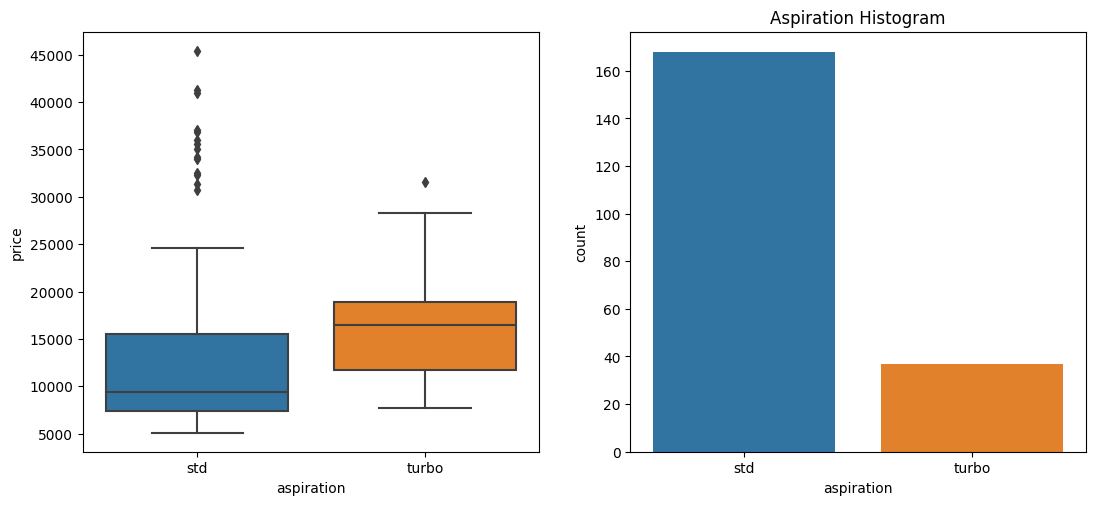

In [29]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = data['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=data, order=order)
plt.show()

**Price VS doornumber**

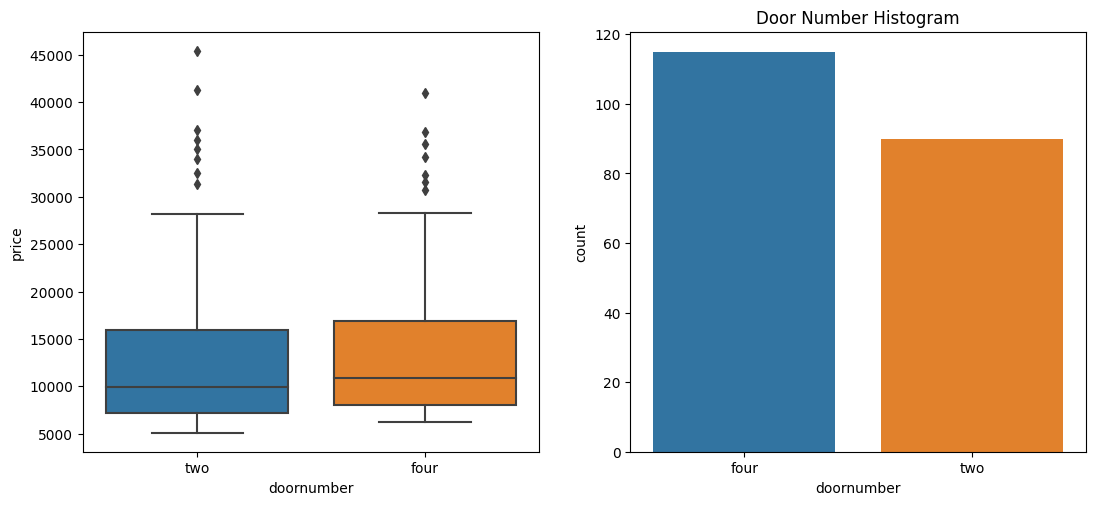

In [30]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = data['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=data, order=order)
plt.show()

**Price VS enginelocation**

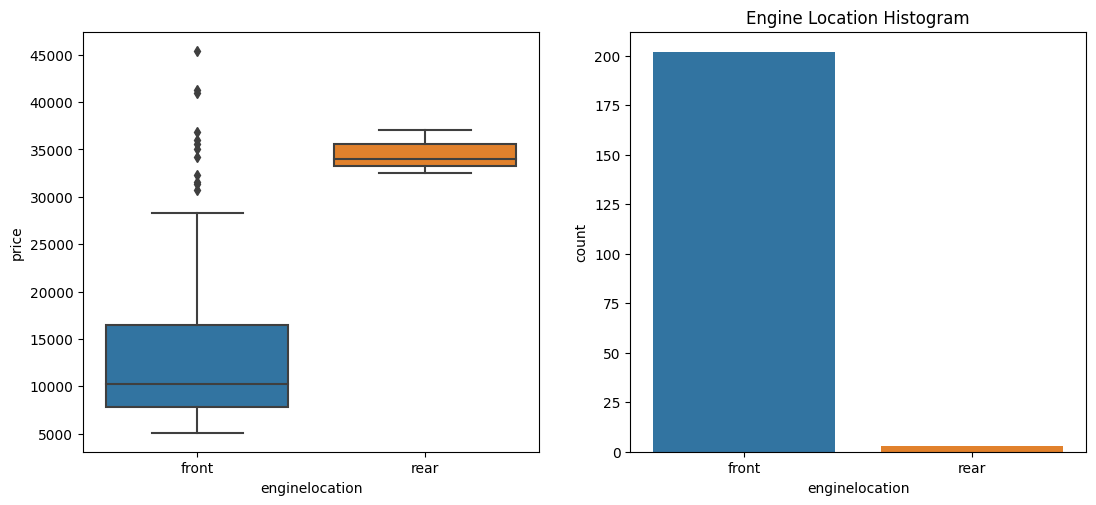

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = data['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=data, order=order)
plt.show()

**Price VS carbody**

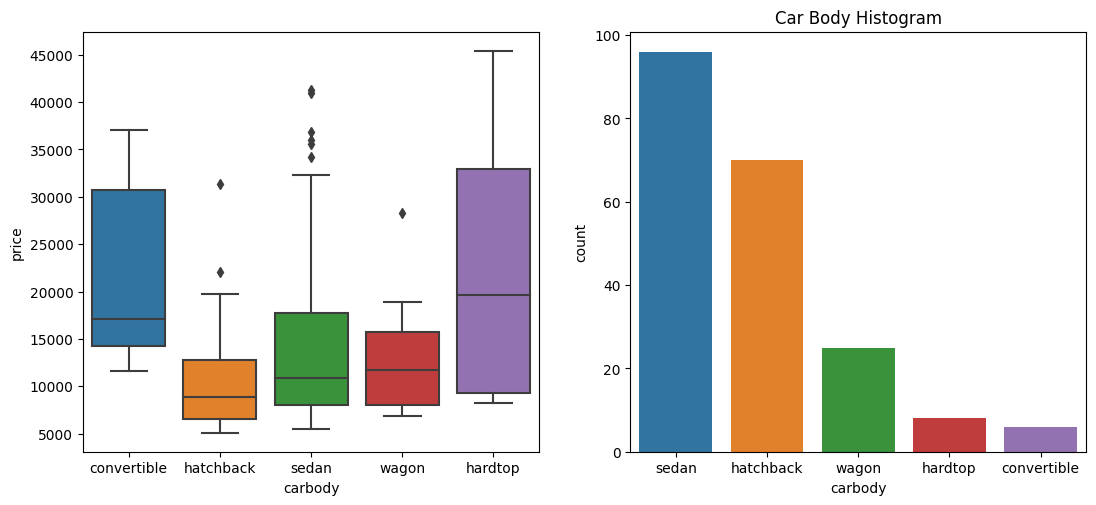

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)
plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)
plt.show()

**Price VS fuelsystem**

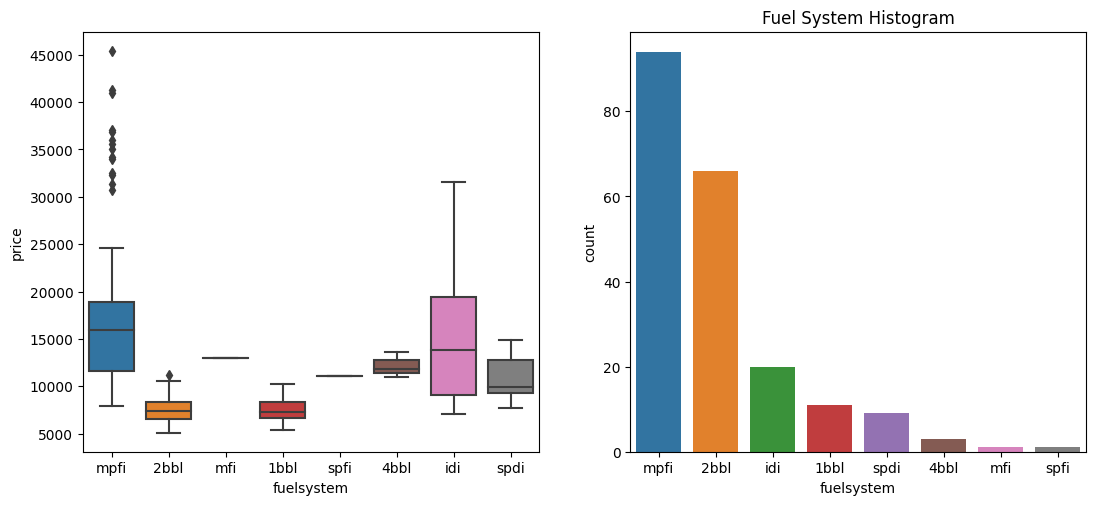

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = data)
plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = data['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=data, order=order)
plt.show()

**Price VS enginetype**

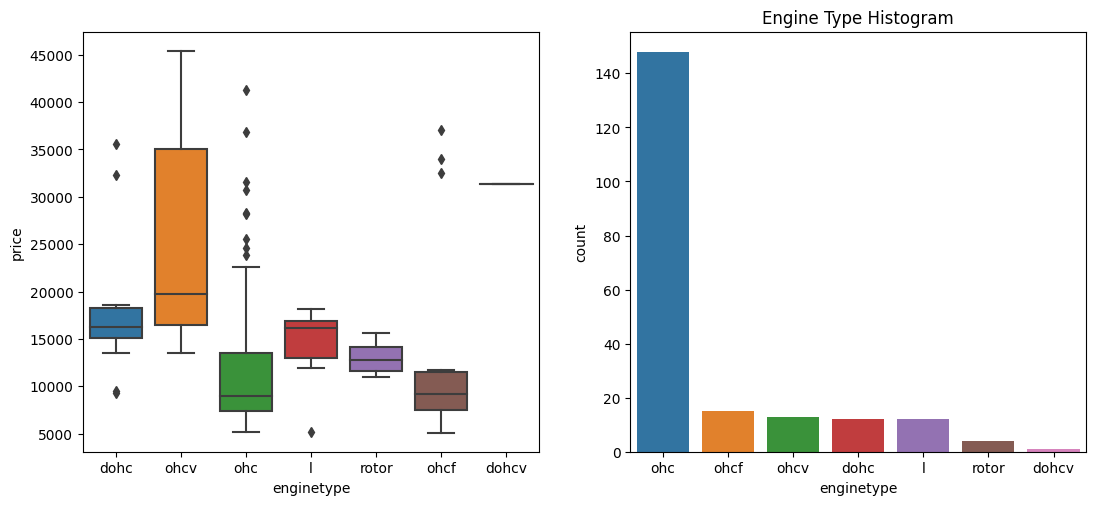

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = data)
plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = data['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=data, order=order)
plt.show()


**Price VS cylindernumber**

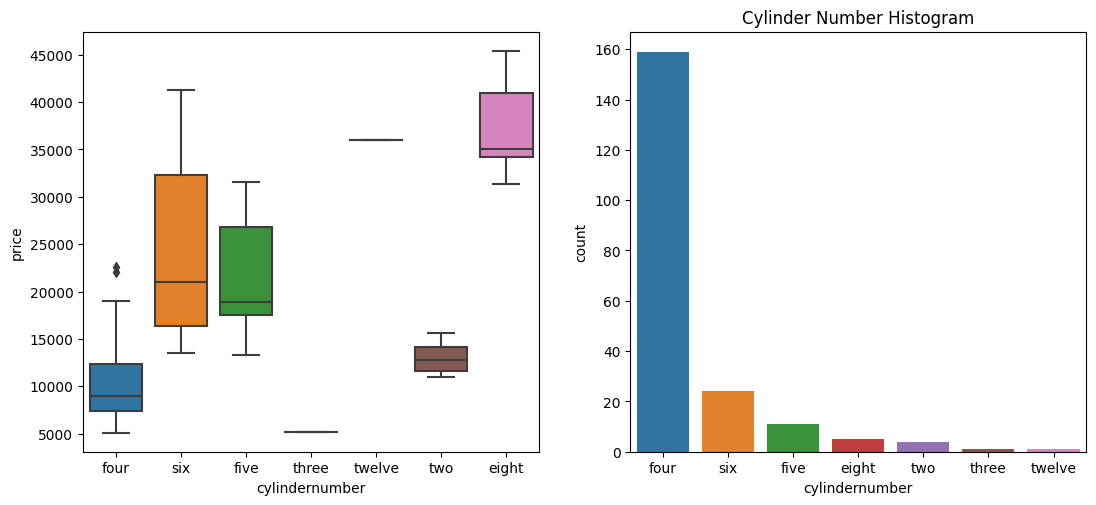

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = data)
plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = data['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=data, order=order)
plt.show()

**Price VS drivewheel**

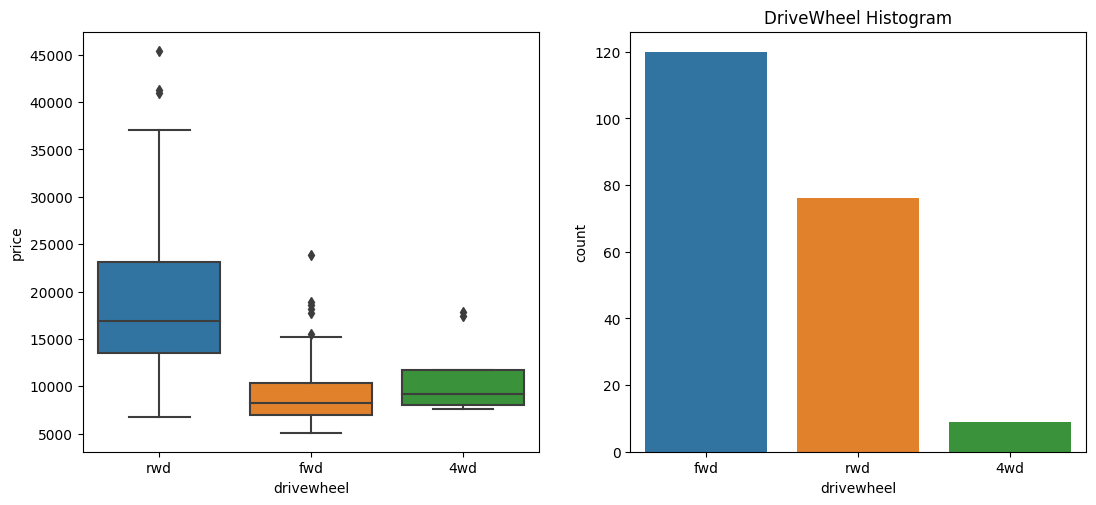

In [36]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = data['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=data, order=order)
plt.show()

**Price VS symboling**

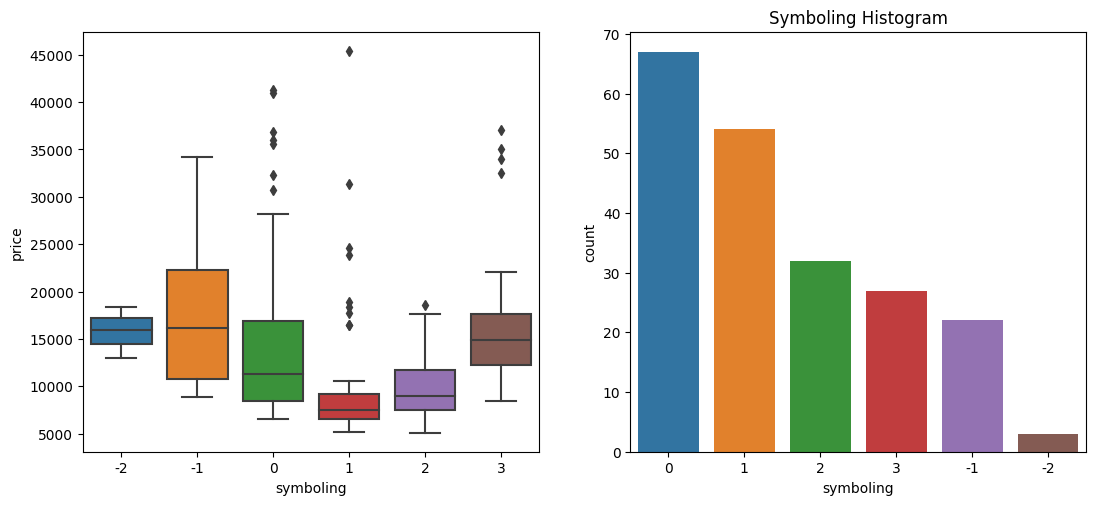

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x=data.symboling, y=data.price)
plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = data['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=data, order=order)
plt.show()

# Data Preparation

In [ ]:
metadata_matrix_dataframe = get_meta_data(data)
list_potential_categorical_type(metadata_matrix_dataframe, data)

## Remove the uncorrelated variables with Price, and choose only one variable among the variables correlated with it

In [40]:
data = data.drop(['carheight', 'stroke','compressionratio','peakrpm','carlength','carwidth','curbweight','enginesize','highwaympg'], axis = 1)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450.0


## Dummy Variables creation

In [41]:
def binary_dummy_replace(x):
    return x.map({"gas" : 1, "diesel" : 0, "std" : 1, "turbo" : 0, "two" : 1, "four" : 0, "front" : 1, "rear" : 0})

def dummies(x,df):
    temp = pd.get_dummies(df[x], prefix = x, drop_first = True)
    
     #l = temp.columns.values
    #for nm in l:
        #newt=x+"_"+nm
        #temp.rename({nm: Replace_Name(x)+"_"+nm}, axis=1, inplace=True)
        
    #print(temp.columns.values)
    
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [42]:
data = dummies("symboling", data)
data = dummies("CompanyName", data)
data = dummies("fueltype", data)
data = dummies("aspiration", data)
data = dummies("doornumber", data)
data = dummies("carbody", data)
data = dummies("drivewheel", data)
data = dummies("enginelocation", data)
data = dummies("enginetype", data)
data = dummies("cylindernumber", data)
data = dummies("fuelsystem", data)

In [43]:
data.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,111,21,13495.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,3.47,111,21,16500.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,2.68,154,19,16500.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,3.19,102,24,13950.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,3.19,115,18,17450.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Preparation of Train and Test data

In [46]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
cars_train, cars_test = train_test_split(data, train_size = 0.67, test_size = 0.33, random_state = 0)

## Feature Scaling: Train Set & Test Set

In [47]:
from sklearn.preprocessing import StandardScaler, scale

# We create an object of the class StandardScaler

sc = StandardScaler()

col_to_scale = ['wheelbase', 'boreratio', 'horsepower', 'citympg', 'price']

cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

cars_train.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,-0.583062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.725116,-0.921031,1.008180,-0.680192,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.985950,-0.947101,1.008180,-0.755502,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-1.246785,-1.364229,2.020054,-0.680691,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.172261,-0.947101,1.008180,-0.917592,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## Division into X_train and y_train sets for model construction

In [48]:
y_train = cars_train.loc[:, cars_train.columns == 'price']
x_train = cars_train.loc[:, cars_train.columns != 'price']

## Division into X_test and y_test sets

In [49]:
y_test = cars_test.loc[:, cars_test.columns == 'price']
x_test = cars_test.loc[:, cars_test.columns != 'price']

# Prediction and Evaluation
- **Prediction**

In [52]:
import statsmodels.api as sm
lm = sm.OLS(y_train, x_train).fit()
y_pred = lm.predict(x_test)


- # Evaluation
## **Residual analysis of the model**

In [53]:
resid = y_test - y_pred.to_frame('price')

 - ## Normality of the error distribution

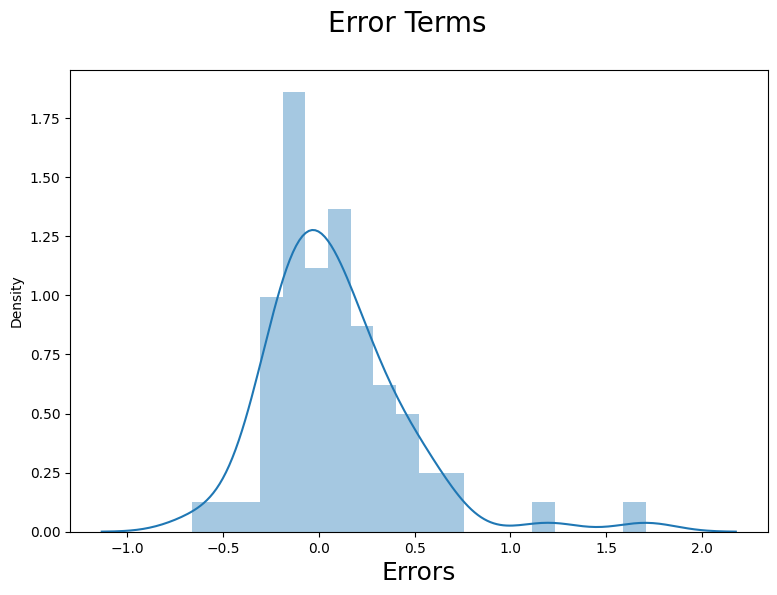

In [54]:
fig = plt.figure(figsize = (9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()

Text(0, 0.5, 'Residuals')

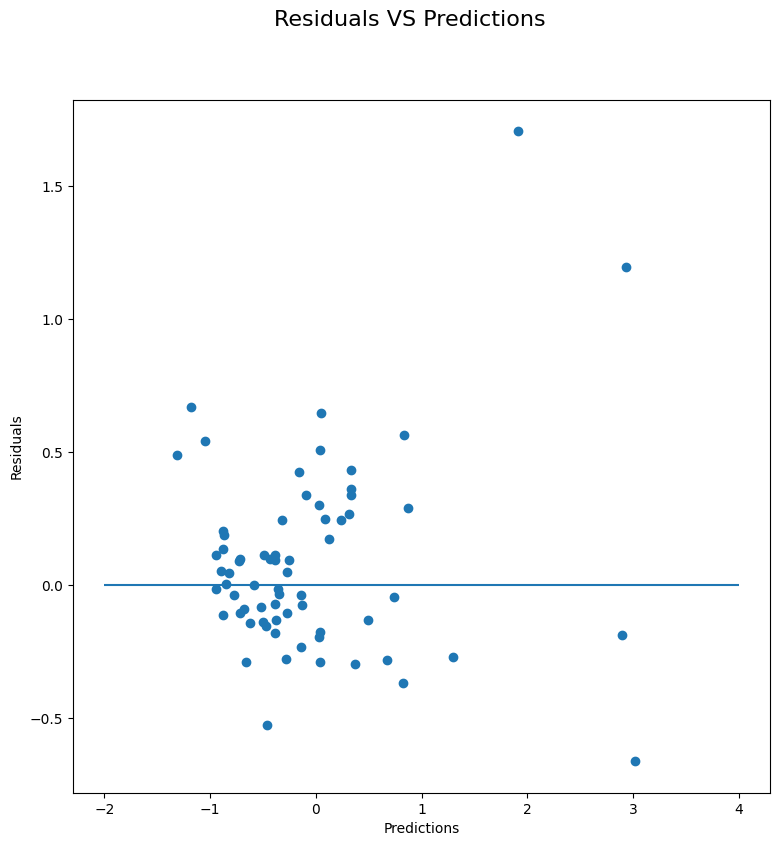

In [55]:
plt.figure(figsize = (9, 9))
plt.scatter(y_pred, resid)
plt.hlines(0, -2, 4)
plt.suptitle('Residuals VS Predictions', fontsize = 16)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

----Anderson-Darling test ---- 
statistic: 0.5530, critical value of 5%: 0.7660


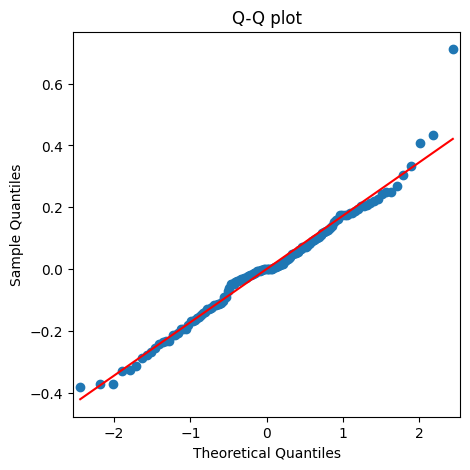

In [58]:
from scipy import stats

def normality_of_residuals_test(model):
    ''' Function to establish the normal QQ graph of the residues and perform the Anderson-Darming statistical test to study the normality of the residuals.
    
    Arg:
    * model - OLS models adapted from statsmodels'''

    sm.ProbPlot(lm.resid).qqplot(line = 's')
    plt.title('Q-Q plot')

    ad = stats.anderson(lm.resid, dist = 'norm')

    print(f'----Anderson-Darling test ---- \nstatistic: {ad.statistic:.4f}, critical value of 5%: {ad.critical_values[2]:.4f}')

normality_of_residuals_test(lm)


Text(0, 0.5, 'Residuals')

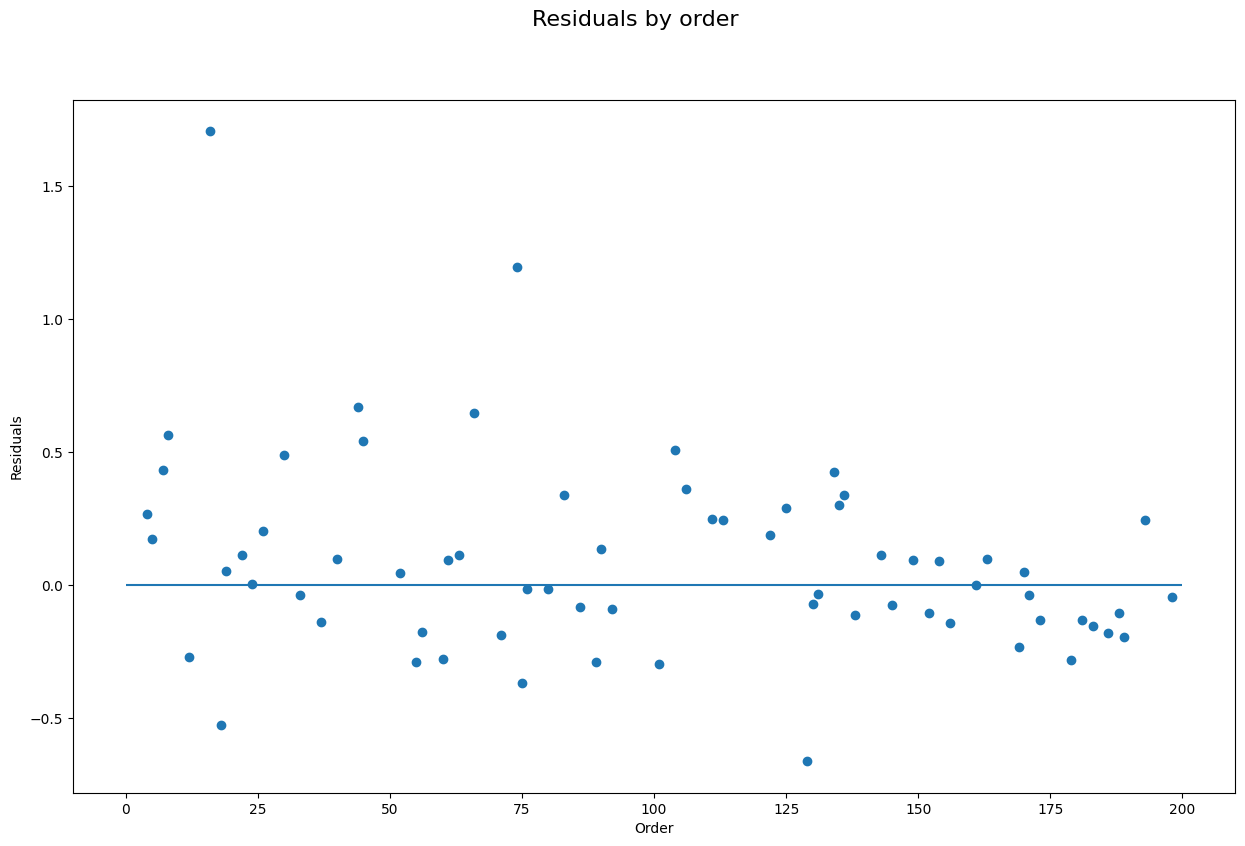

In [59]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)
plt.suptitle('Residuals by order', fontsize=16)
plt.xlabel('Order')
plt.ylabel('Residuals')

In [60]:
from statsmodels.stats.stattools import durbin_watson

In [61]:
print(durbin_watson(resid))

[1.77471261]


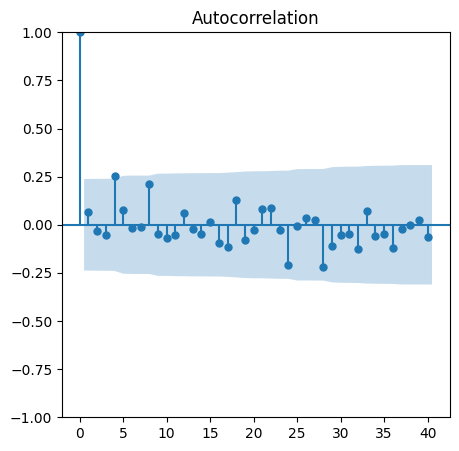

In [63]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(resid, lags = 40, alpha = 0.05)
acf.show()

In [64]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)



----Goldfeld-Quandt test ----
[('F statistic', 1.8786403206327877), ('p-value', 0.07034410207973107)]

----Residuals plots ----


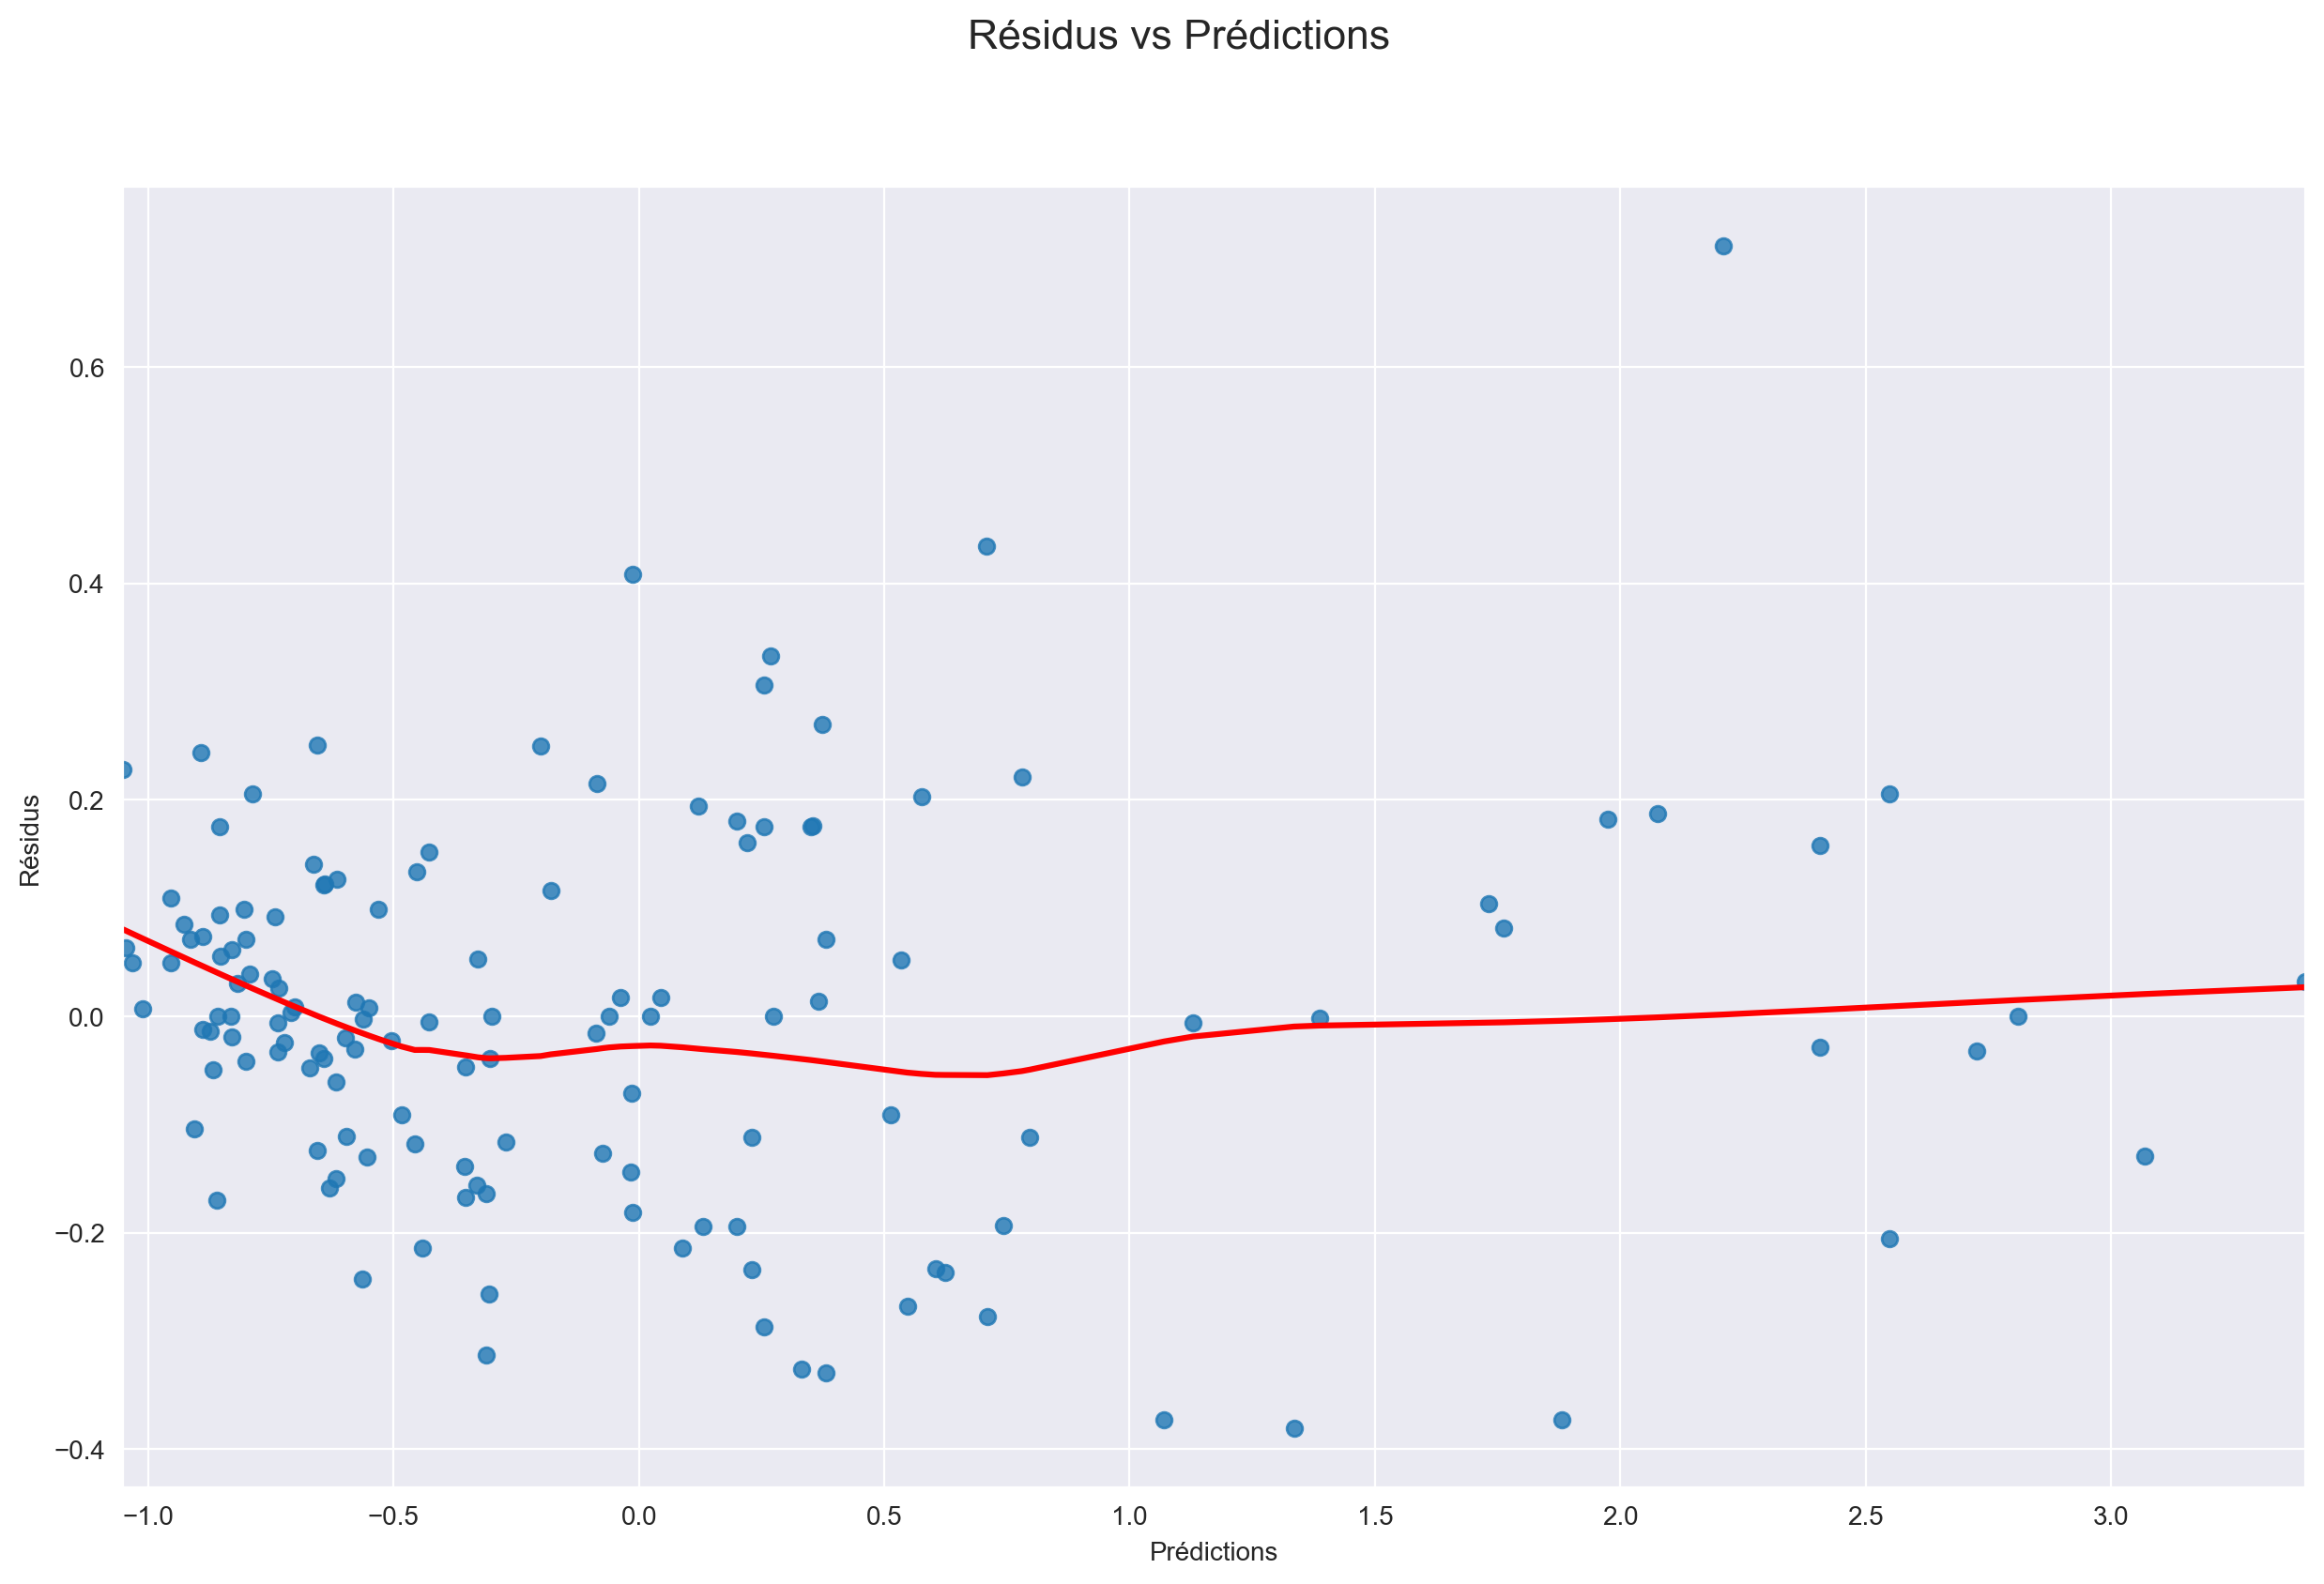

In [66]:
def homoscedasticity_test(model):
    '''
    Fonction de test de l'homoscédasticité des résidus dans un modèle de régression linéaire.

    Il compare les valeurs résiduelles aux valeurs prédites et exécute les tests de Goldfeld-Quandt.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid

    #fit_reg=False
    sns.regplot(x=fitted_vals, y=resids, lowess=True, line_kws={'color': 'red'})
    plt.suptitle('Résidus vs Prédictions', fontsize=16)
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')

    print('\n----Goldfeld-Quandt test ----')
    name = ['F statistic', 'p-value']
    test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
    print(lzip(name, test))
    print('\n----Residuals plots ----')

homoscedasticity_test(lm)

## Evaluation of the test via the comparison of y_pred and y_test

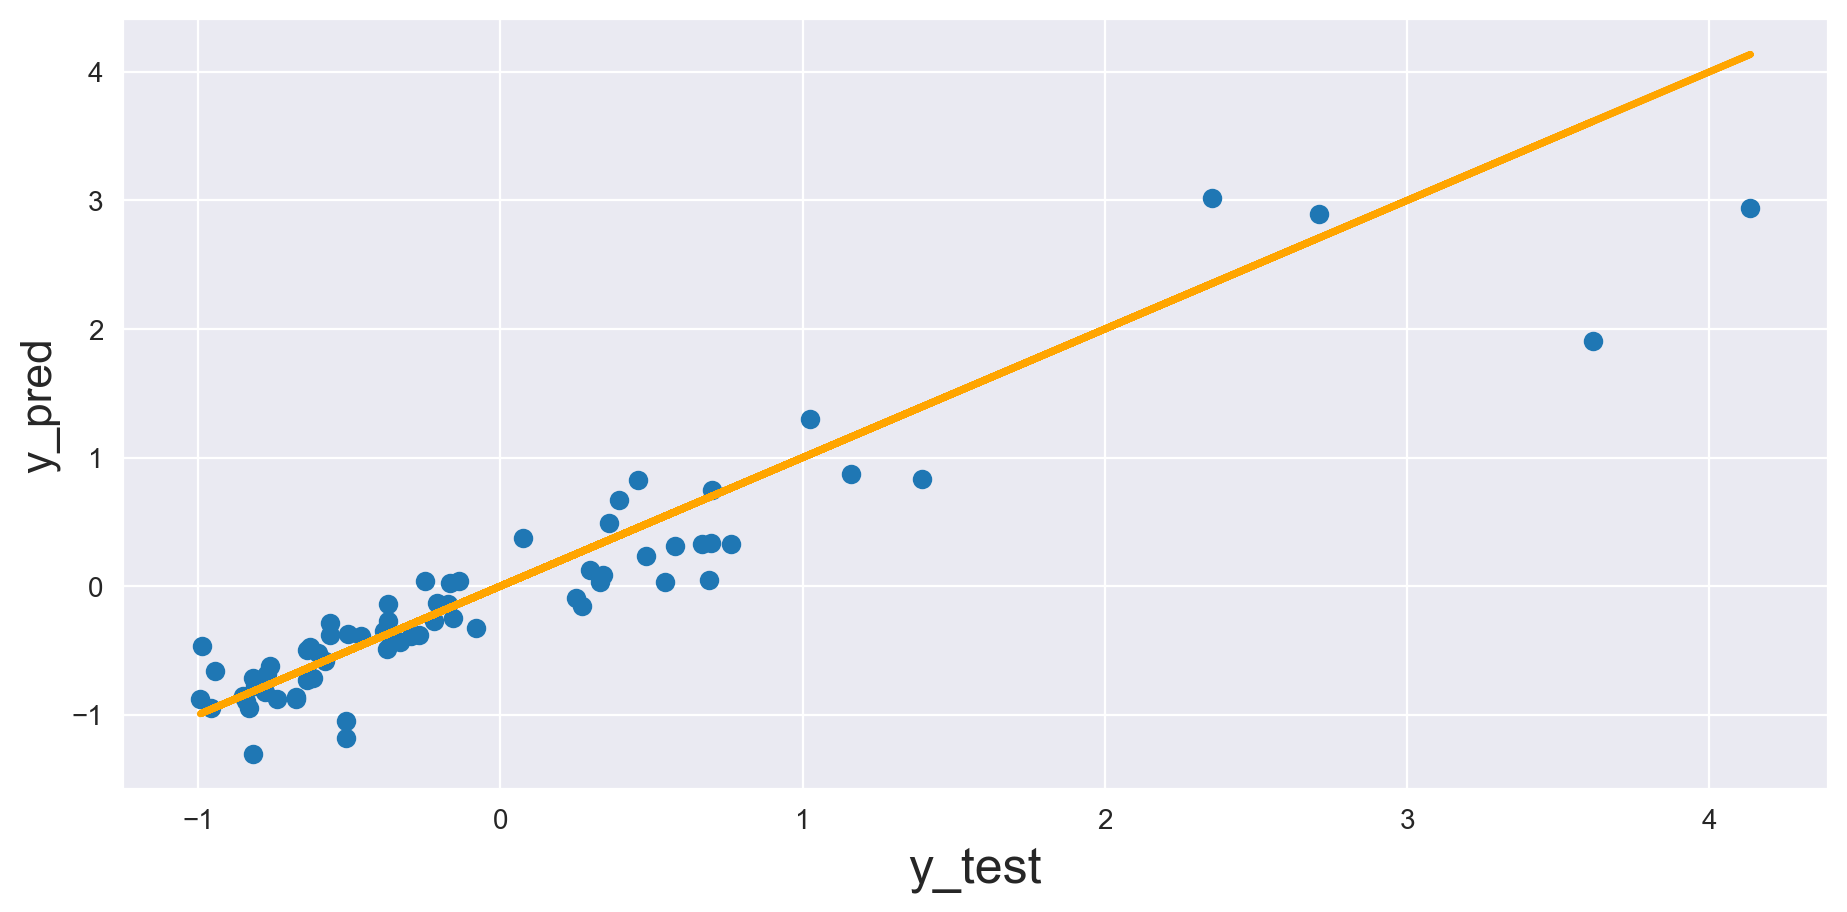

In [67]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

# Final Summary - Part 1

In [68]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8620873815429437

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.21
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.01e-48
Time:                        05:20:28   Log-Likelihood:                 46.514
No. Observations:                 137   AIC:                             8.971
Df Residuals:                      86   BIC:                             157.9
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
wheelbase                 

# RFE - Recursive Feature Elimination

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [72]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [76]:
rfe = RFE(regression)
rfe = rfe.fit(x_train,y_train)

In [79]:
for z in range(len(x_train.columns)):
    print(x_train.columns[z],'\t\t\t',rfe.support_[z])

wheelbase 			 True
boreratio 			 False
horsepower 			 True
citympg 			 False
symboling_-1 			 False
symboling_0 			 False
symboling_1 			 False
symboling_2 			 False
symboling_3 			 True
CompanyName_alfa-romero 			 False
CompanyName_audi 			 False
CompanyName_bmw 			 True
CompanyName_buick 			 True
CompanyName_chevrolet 			 True
CompanyName_dodge 			 True
CompanyName_honda 			 True
CompanyName_isuzu 			 True
CompanyName_jaguar 			 True
CompanyName_mazda 			 True
CompanyName_mercury 			 False
CompanyName_mitsubishi 			 True
CompanyName_nissan 			 True
CompanyName_peugeot 			 False
CompanyName_plymouth 			 True
CompanyName_porsche 			 True
CompanyName_renault 			 False
CompanyName_saab 			 False
CompanyName_subaru 			 False
CompanyName_toyota 			 True
CompanyName_volkswagen 			 True
CompanyName_volvo 			 False
fueltype_gas 			 True
aspiration_turbo 			 False
doornumber_two 			 False
carbody_hardtop 			 True
carbody_hatchback 			 True
carbody_sedan 			 True
carbody_wagon 			 True
drivewhe

## The columns selected by RFE

In [80]:
col = x_train.columns[rfe.support_]
for x in col:
    print(x)

wheelbase
horsepower
symboling_3
CompanyName_bmw
CompanyName_buick
CompanyName_chevrolet
CompanyName_dodge
CompanyName_honda
CompanyName_isuzu
CompanyName_jaguar
CompanyName_mazda
CompanyName_mitsubishi
CompanyName_nissan
CompanyName_plymouth
CompanyName_porsche
CompanyName_toyota
CompanyName_volkswagen
fueltype_gas
carbody_hardtop
carbody_hatchback
carbody_sedan
carbody_wagon
enginelocation_rear
enginetype_ohc
enginetype_rotor
cylindernumber_five
cylindernumber_four
cylindernumber_six
cylindernumber_twelve
fuelsystem_spfi


## Using statsmodel package, for detailed statistics

In [81]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,wheelbase,horsepower,symboling_3,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_plymouth,CompanyName_porsche,CompanyName_toyota,CompanyName_volkswagen,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_spfi
155,-0.534054,-1.103524,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
97,-0.723234,-0.921031,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
54,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
184,-0.281814,-1.364229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
51,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [82]:
import statsmodels.api as sm 

def color_code_vif_values(val):
    """
    Take a scalar and return a string with the property css 'color: red' for 10, black otherwise.
    """
    if val > 10 : color = 'red' 
    elif val > 5 and val <= 10 : color = 'blue'
    elif val > 0 and val <= 5 : color = 'darkgreen'
    else : color = 'black'
    return 'color: %s' % color

def drop_col(dataframe,col_to_drop) :
    dataframe.drop([col_to_drop],axis=1,inplace=True)
    return dataframe

def display_vif(x) :
    #Calculer les VIFs pour le nouveau modèle
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    X = x
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index("Features")
    vif = vif.sort_values(by = "VIF", ascending = False)
    df = pd.DataFrame(vif.VIF).style.applymap(color_code_vif_values)
    display(df)
    
model_count = 0

def statsmodel_summary(y_var,x_var) :
    global model_count
    model_count = model_count + 1
    text = "*****MODEL - " + str(model_count)
    print(text)
    
    x_var_const = sm.add_constant(x_var) # adding constant
    lm = sm.OLS(y_var,x_var_const).fit() # calculating the fit
    print(lm.summary()) # print summary for analysis
    display_vif(x_var_const.drop(['const'],axis=1))
    return x_var_const , lm

In [ ]:
lm = statsmodel_summary(y_train,x_train_rfe)

In [85]:
x_train_rfe = x_train_rfe.drop(["carbody_sedan"], axis = 1)
x_train_rfe.head()

,wheelbase,horsepower,symboling_3,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_plymouth,CompanyName_porsche,CompanyName_toyota,CompanyName_volkswagen,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_wagon,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_spfi
155,-0.534054,-1.103524,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0
97,-0.723234,-0.921031,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
54,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
184,-0.281814,-1.364229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
51,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0


In [86]:
x_train_rfe = x_train_rfe.drop(["carbody_wagon"], axis = 1)
x_train_rfe.head()

,wheelbase,horsepower,symboling_3,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_plymouth,CompanyName_porsche,CompanyName_toyota,CompanyName_volkswagen,fueltype_gas,carbody_hardtop,carbody_hatchback,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_spfi
155,-0.534054,-1.103524,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
97,-0.723234,-0.921031,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
54,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
184,-0.281814,-1.364229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
51,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0


In [ ]:
lm = statsmodel_summary(y_train,x_train_rfe)

In [89]:
x_train_rfe = x_train_rfe.drop(["CompanyName_porsche"], axis = 1)
x_train_rfe.head()

,wheelbase,horsepower,symboling_3,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_plymouth,CompanyName_toyota,CompanyName_volkswagen,fueltype_gas,carbody_hardtop,carbody_hatchback,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_spfi
155,-0.534054,-1.103524,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
97,-0.723234,-0.921031,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
54,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
184,-0.281814,-1.364229,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
51,-0.943944,-0.947101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0


# Prediction and Evaluation
- **Prédiction**

In [92]:
#Array containing names of important variables
final_features = list(x_train_rfe.columns)

#Filter the test dataset
x_test_new = x_test.filter(final_features)

x_test_new.head()

,wheelbase,horsepower,symboling_3,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_plymouth,CompanyName_toyota,CompanyName_volkswagen,fueltype_gas,carbody_hardtop,carbody_hatchback,enginelocation_rear,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_spfi
52,-0.959261,-0.858916,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0
181,1.232366,1.258823,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.328801,0.151823,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
18,-1.862826,-1.340220,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
188,-0.151819,-0.088829,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0


In [93]:
# Making predictions
lm = sm.OLS(y_train,x_train_rfe).fit()

y_pred=lm.predict(x_test_new)

- **Evaluation**

In [94]:
resid = y_test - y_pred.to_frame('price')

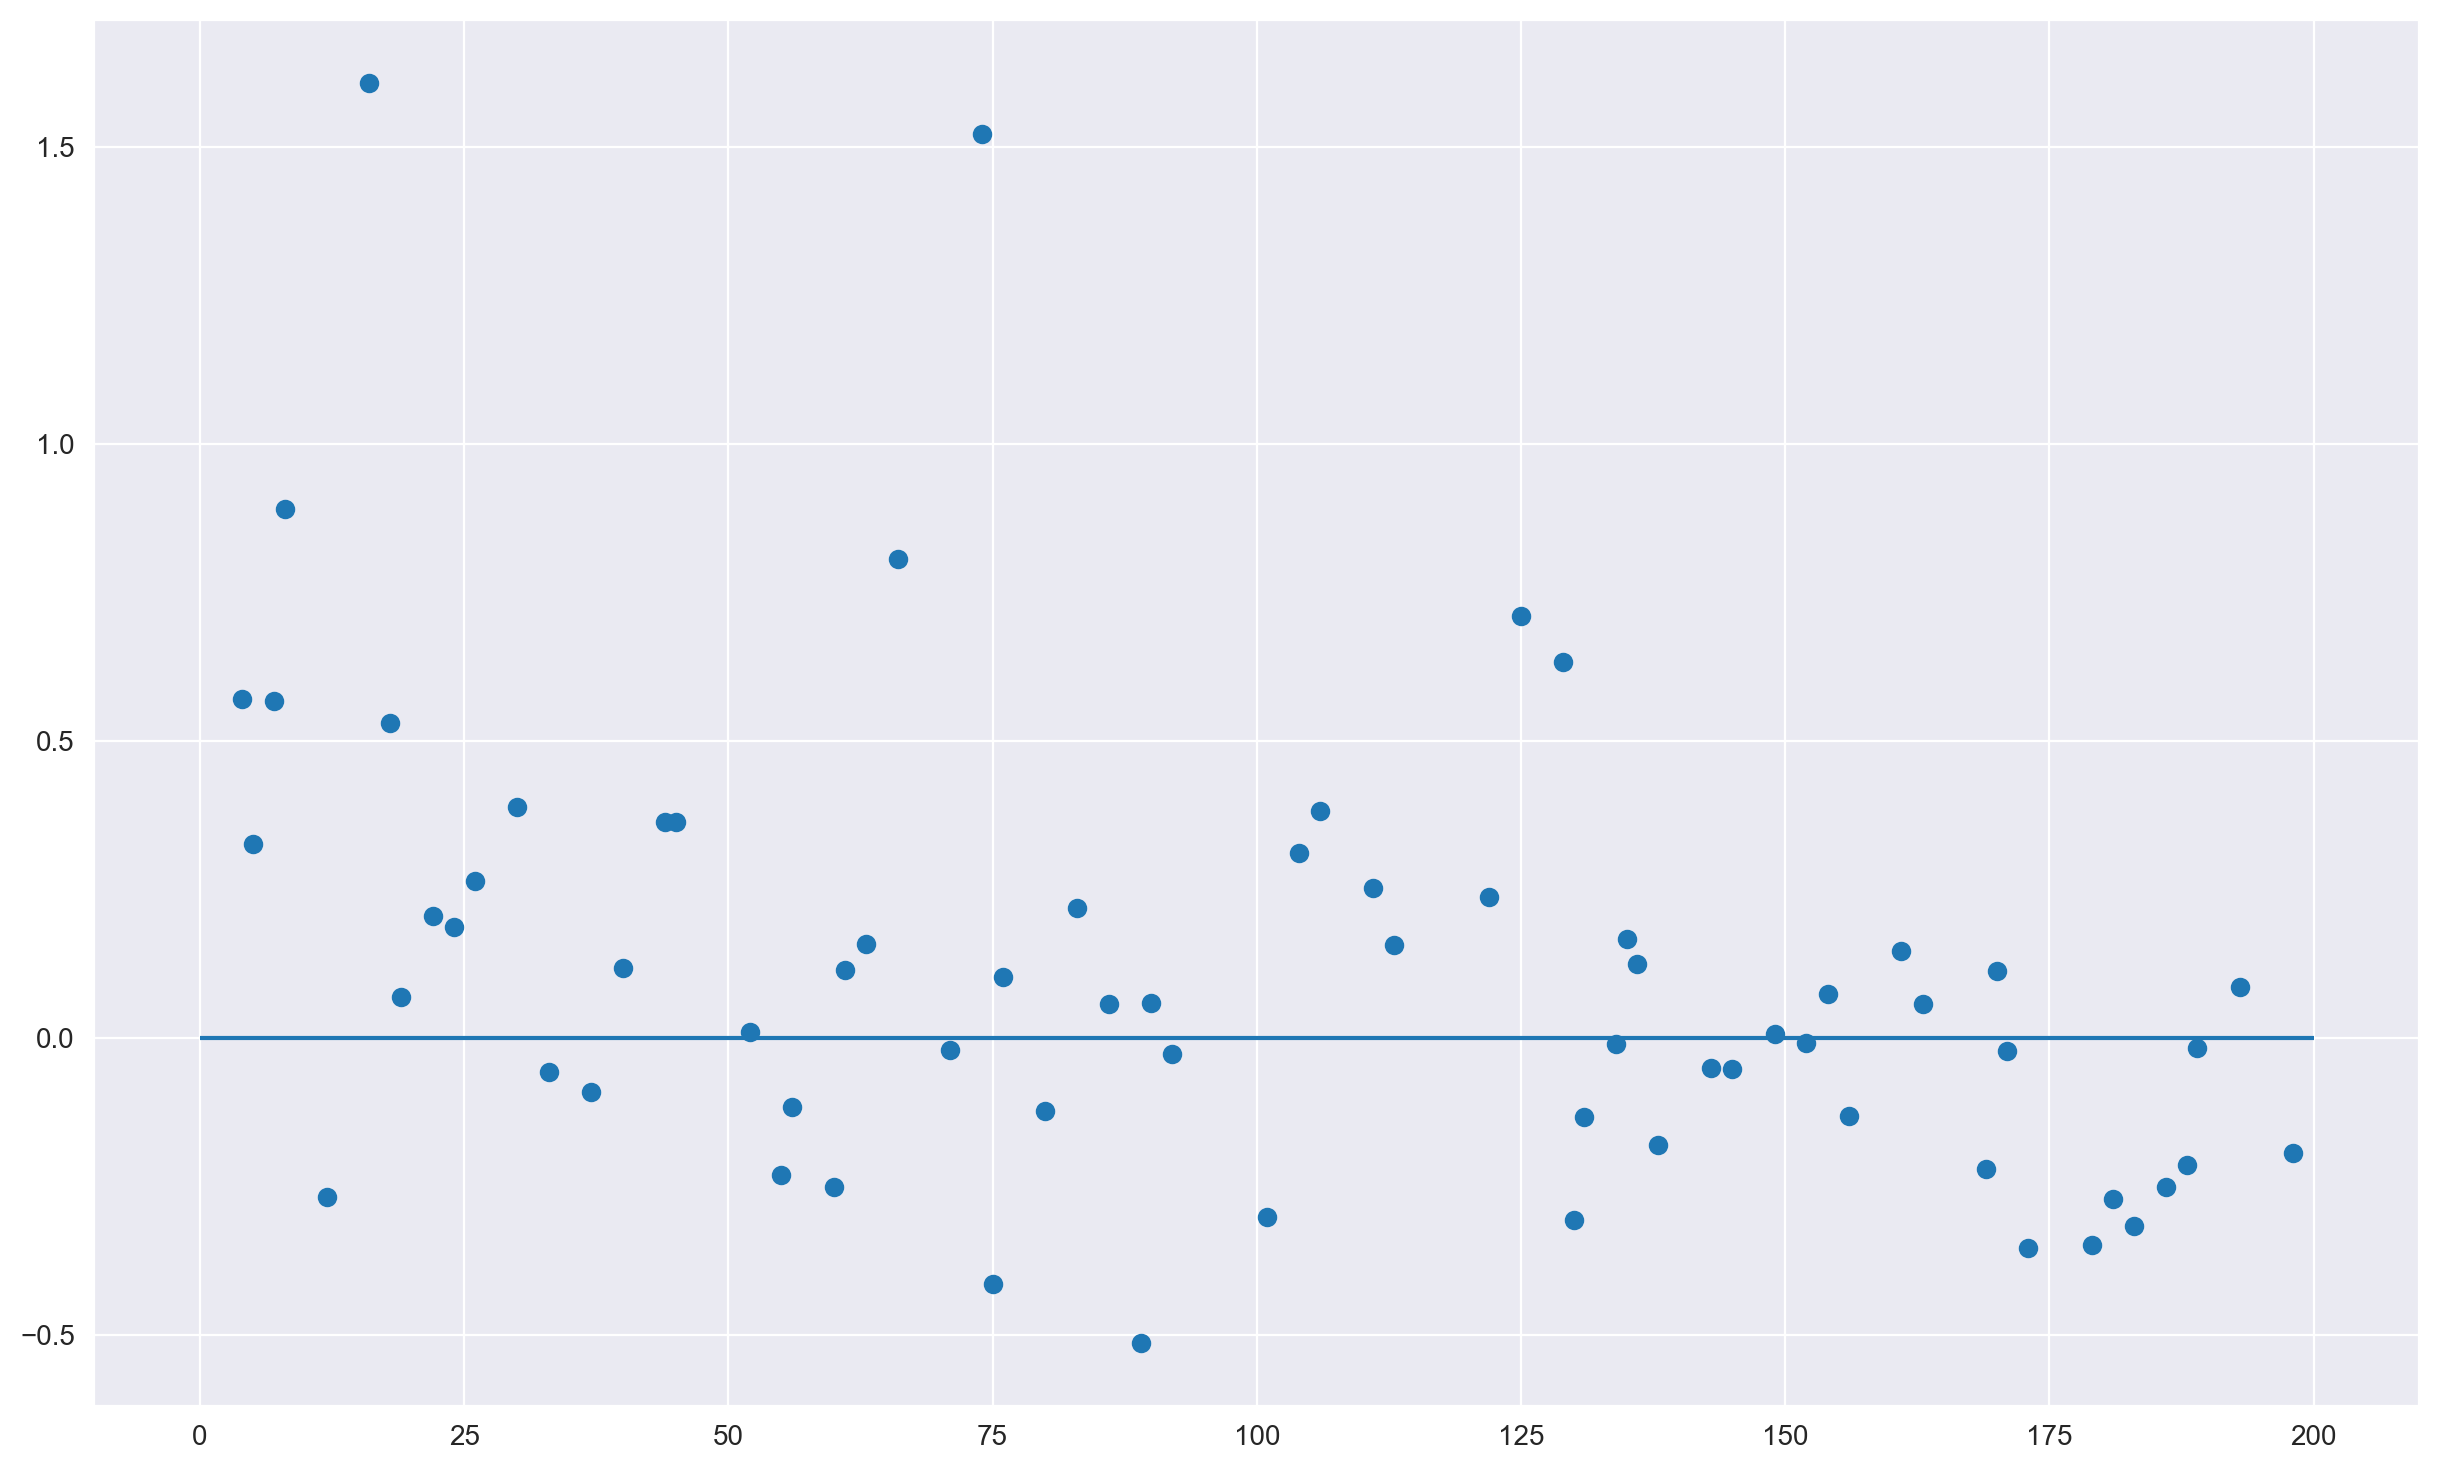

In [95]:
plt.figure(figsize=(15,9))
plt.scatter(resid.index, resid.values)
plt.hlines(0,0,200)

In [96]:
print(durbin_watson(resid))

[1.92458956]


- **ACF - Auto-Correlation Function plots**

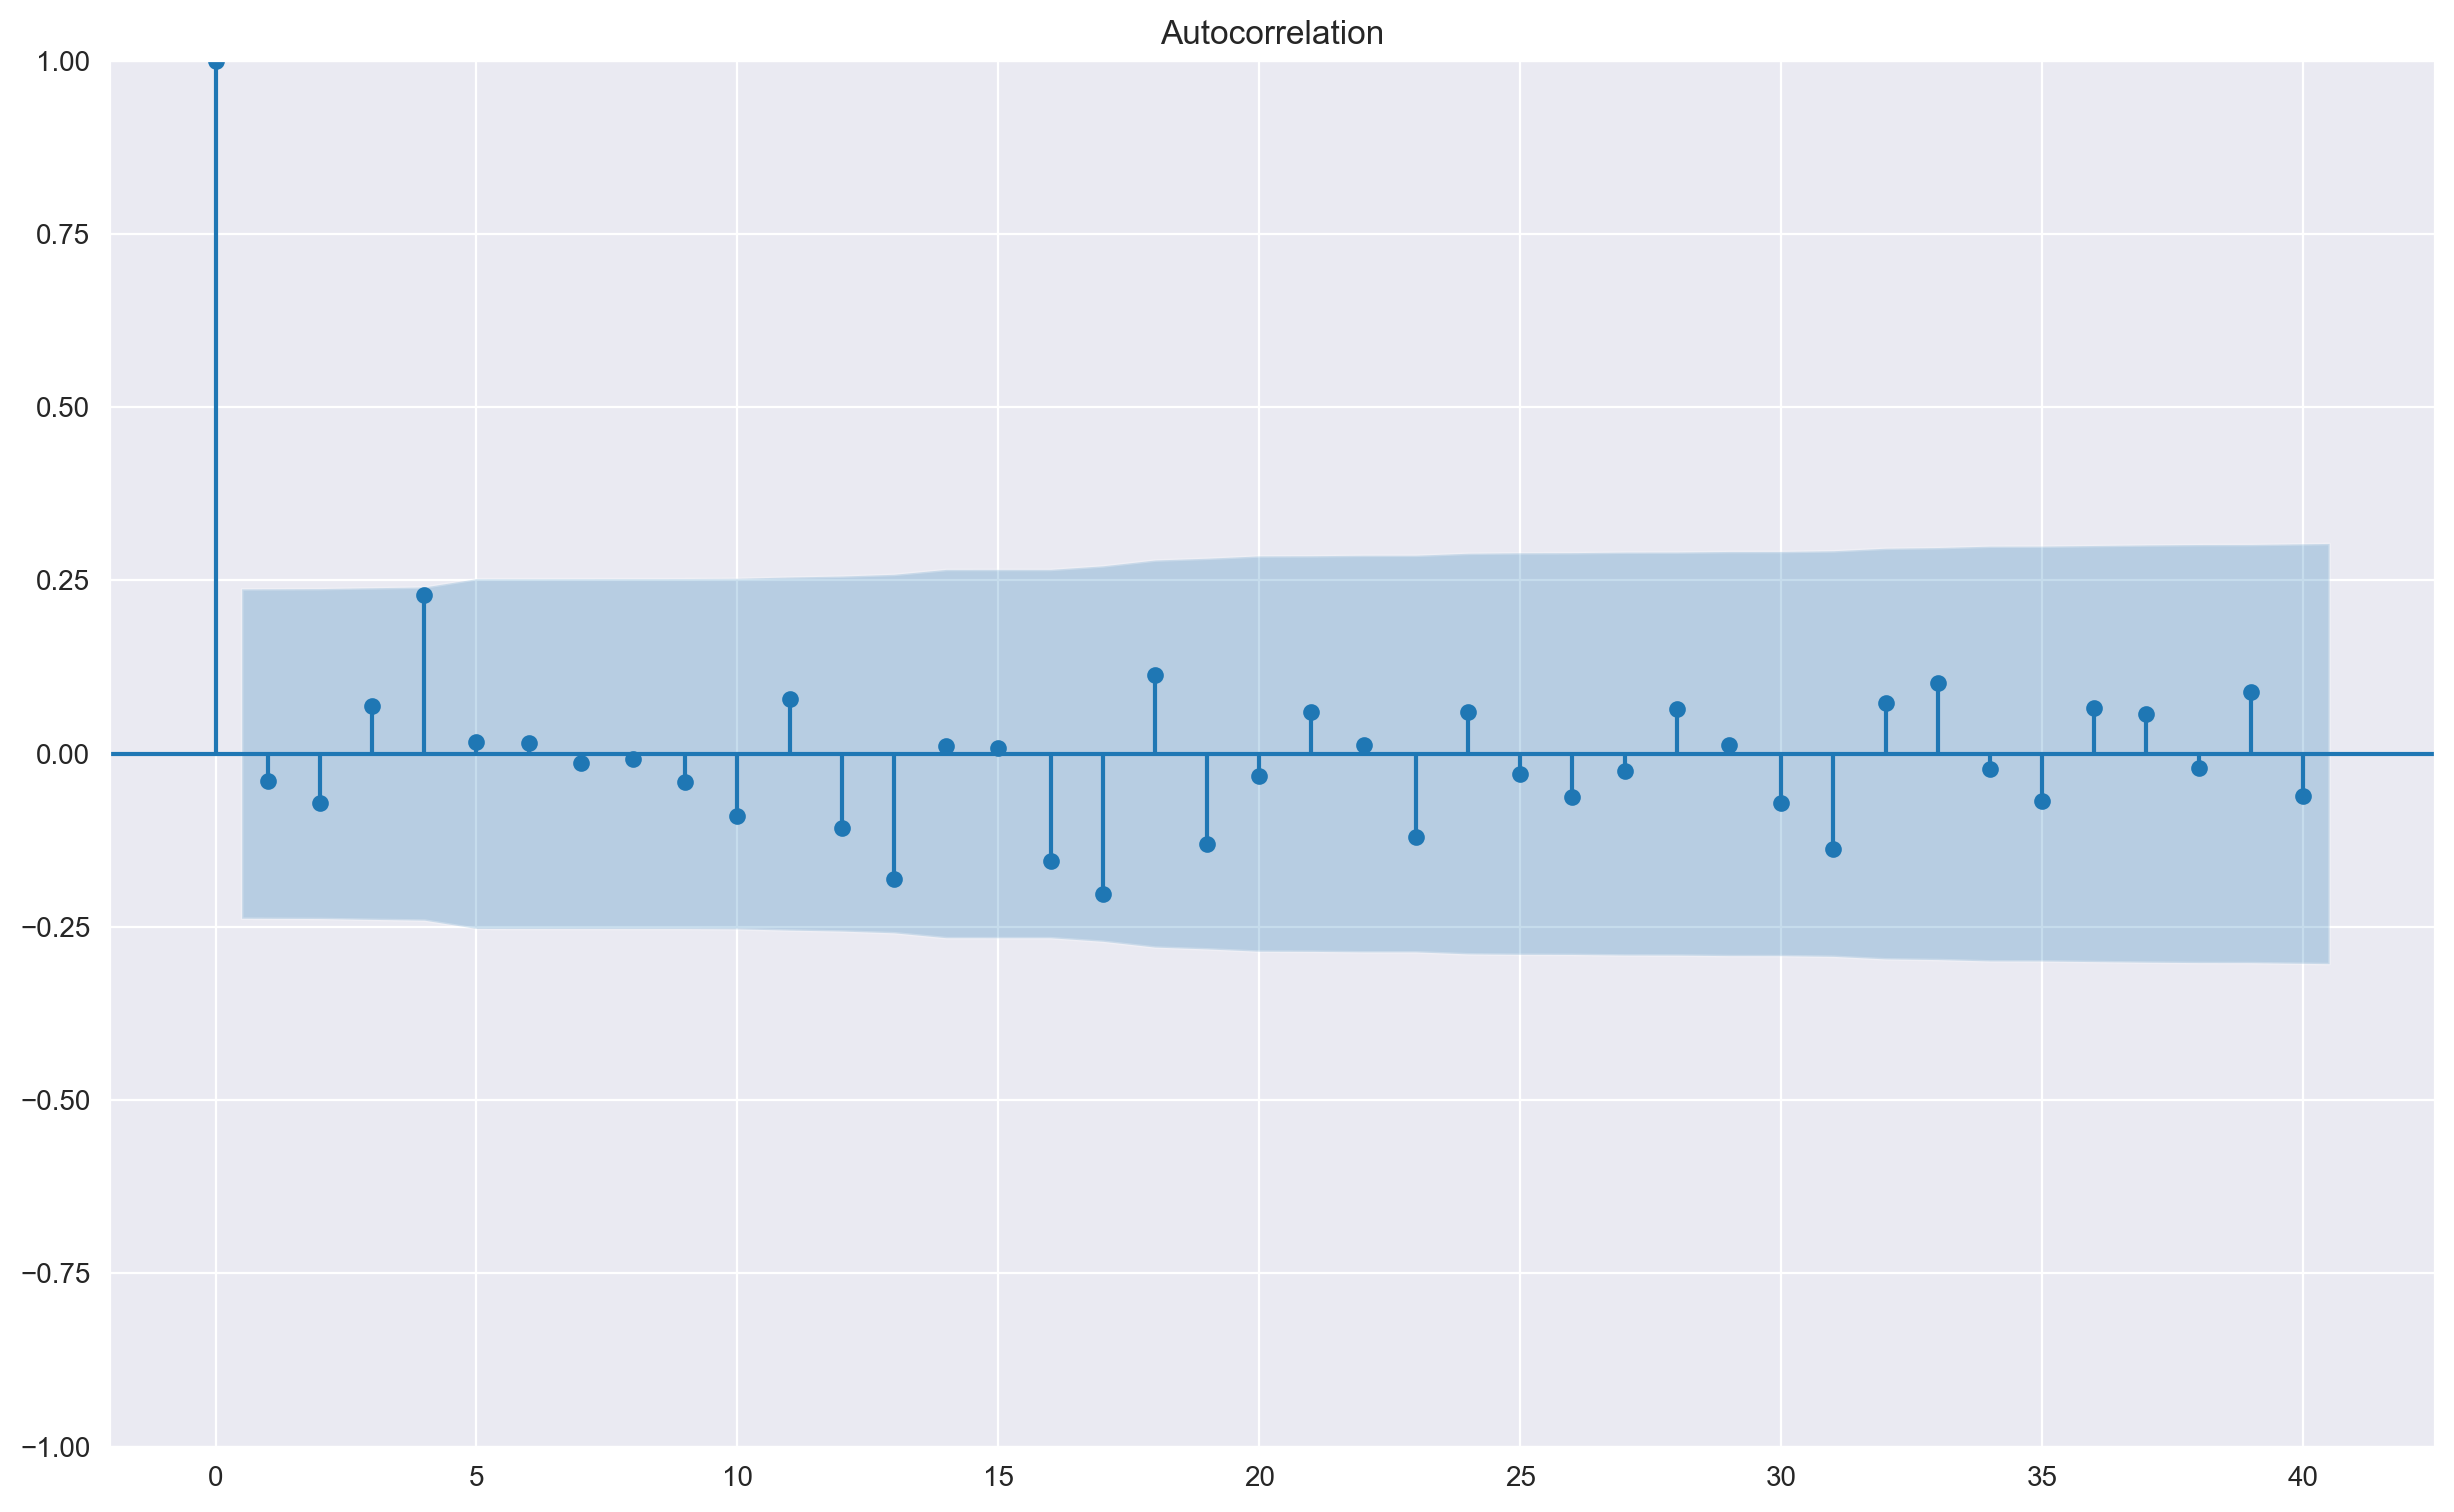

In [97]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()


----Goldfeld-Quandt test ----
[('F statistic', 1.672003552200641), ('p-value', 0.04500501260389235)]

----Residuals plots ----


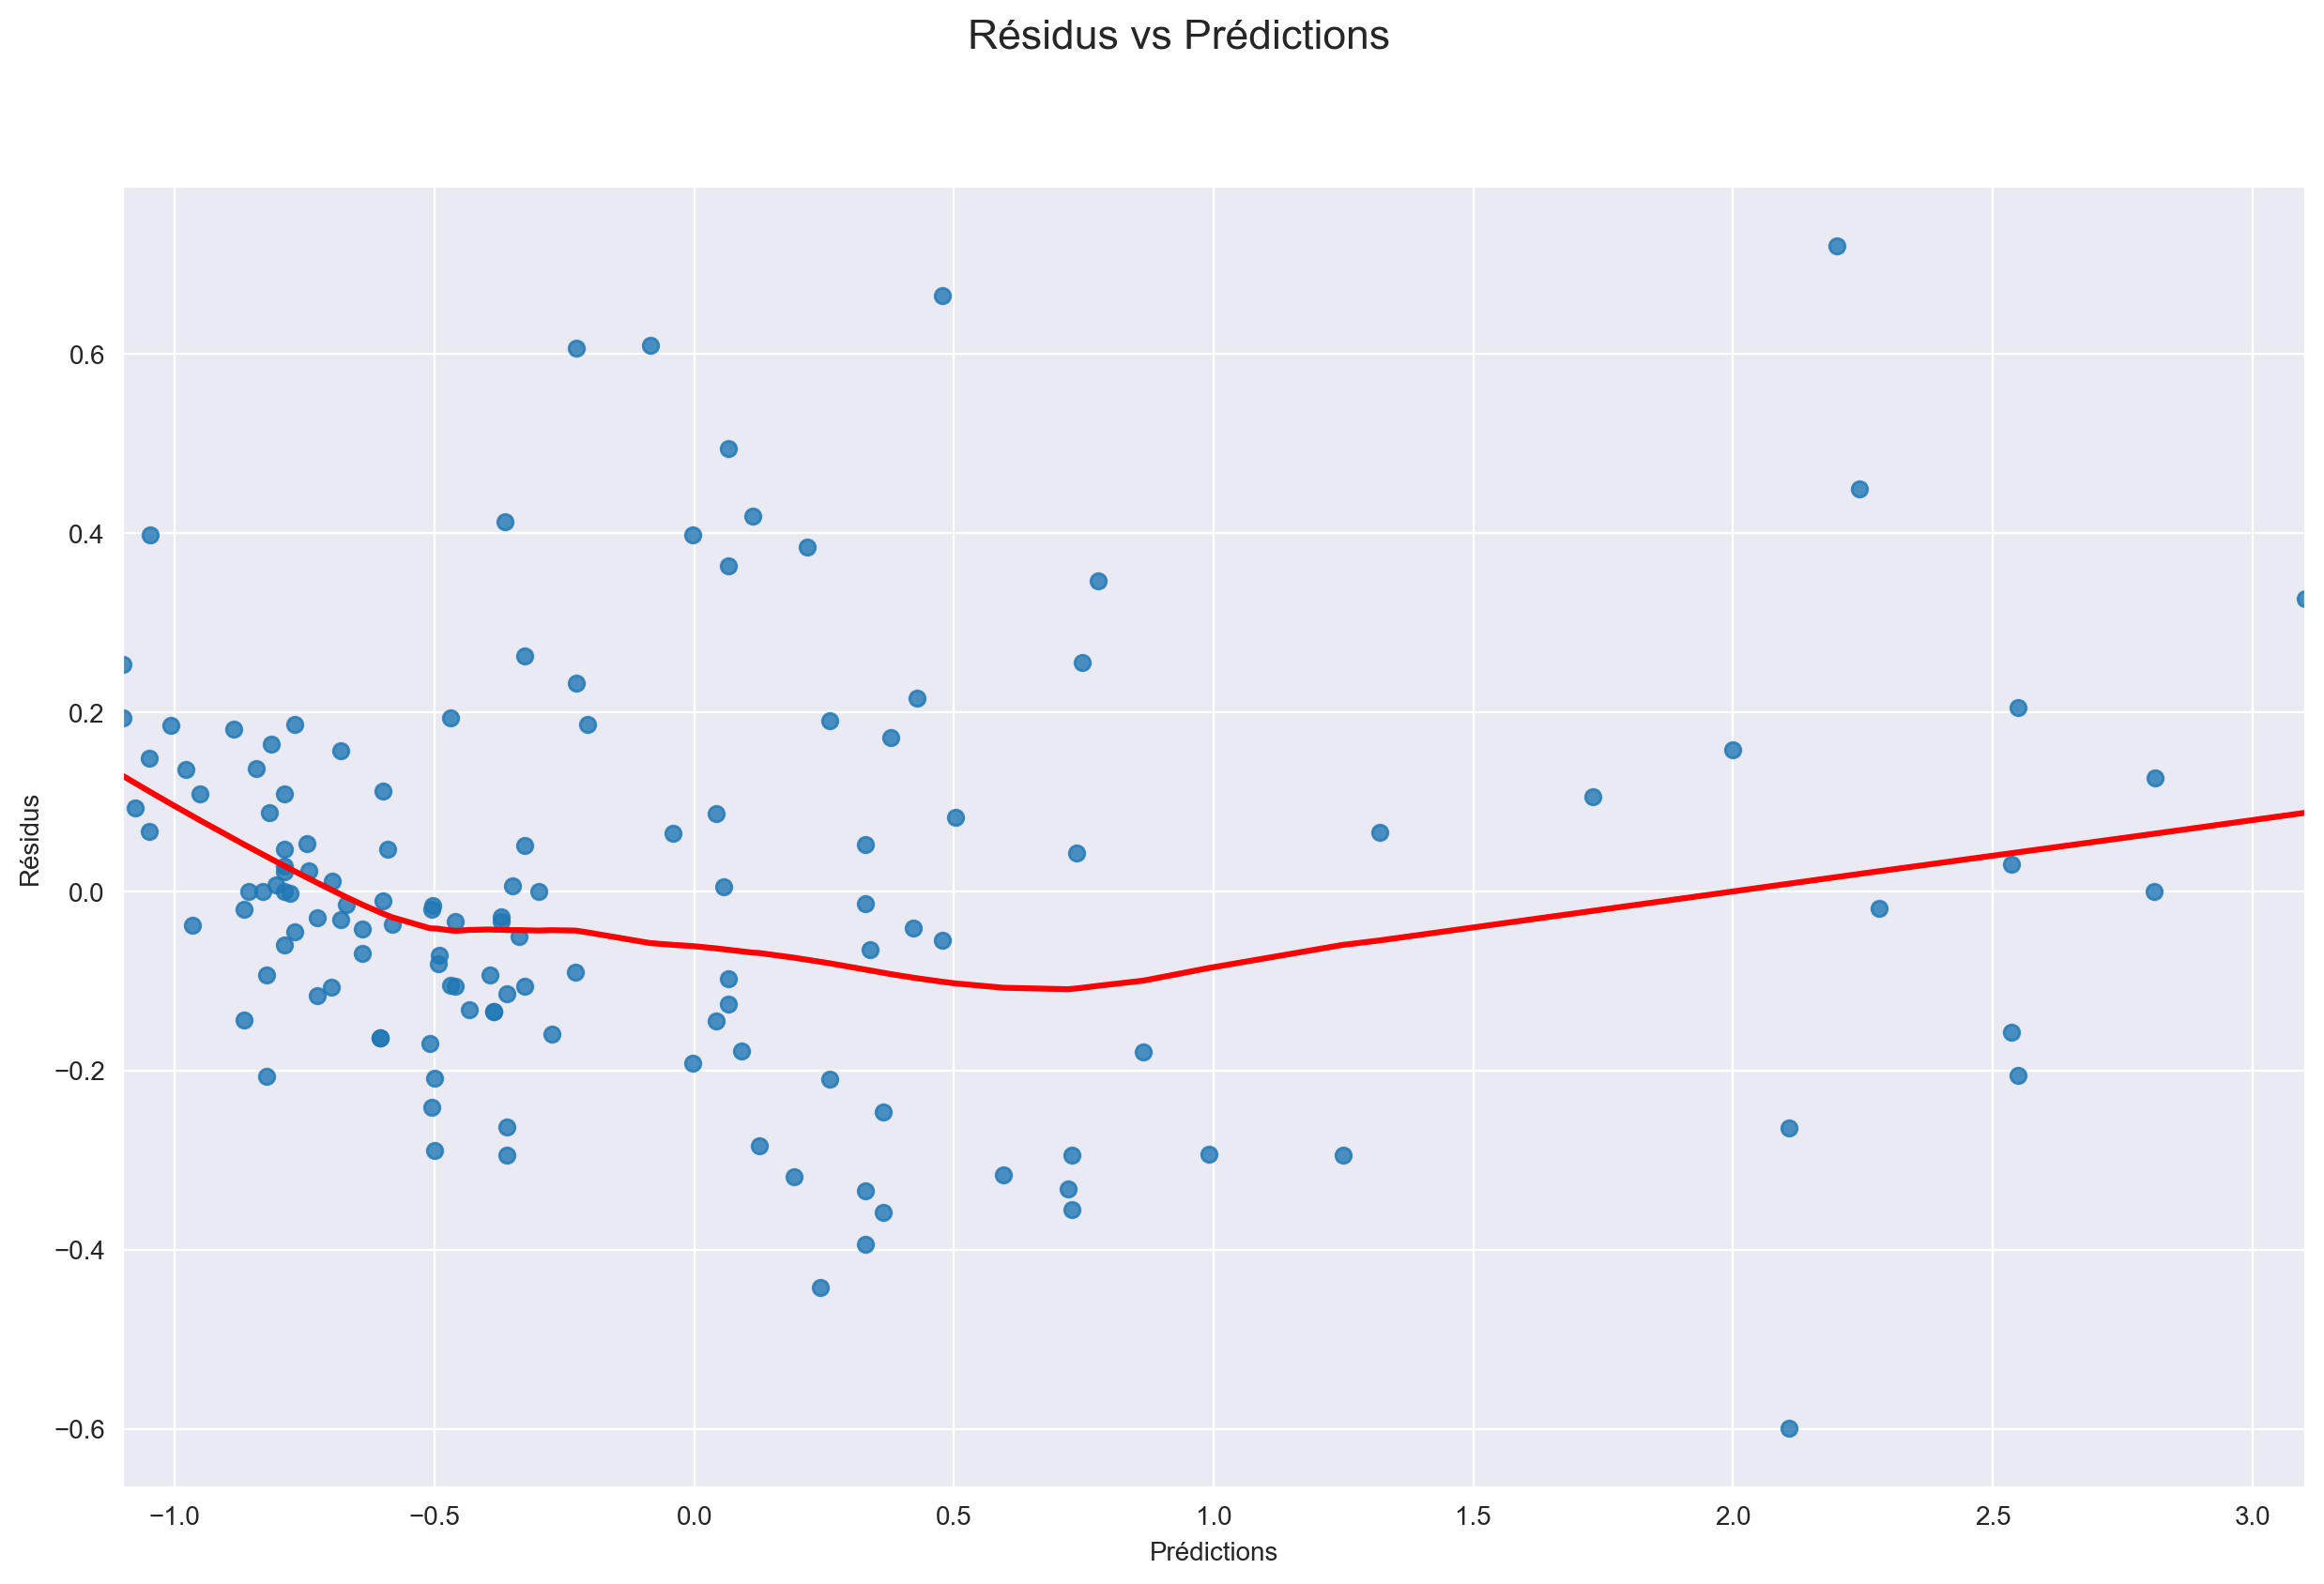

In [98]:
homoscedasticity_test(lm)

- **Normality of the error distribution**

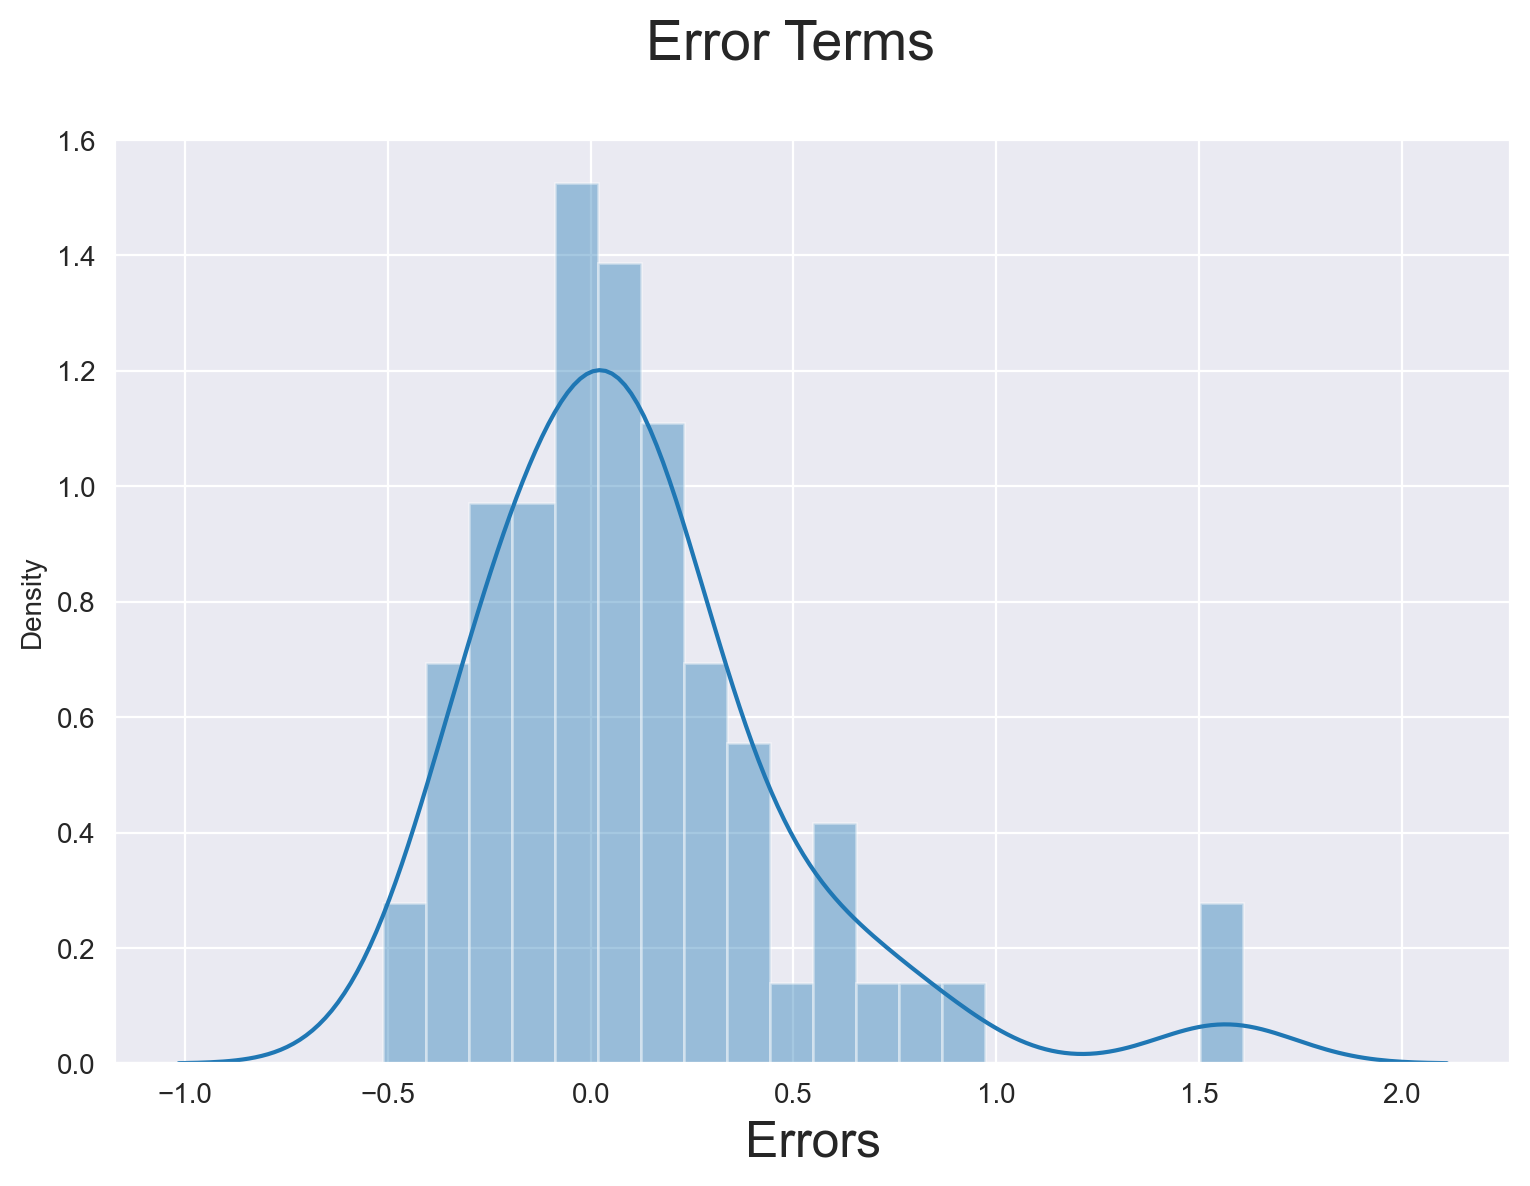

In [99]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

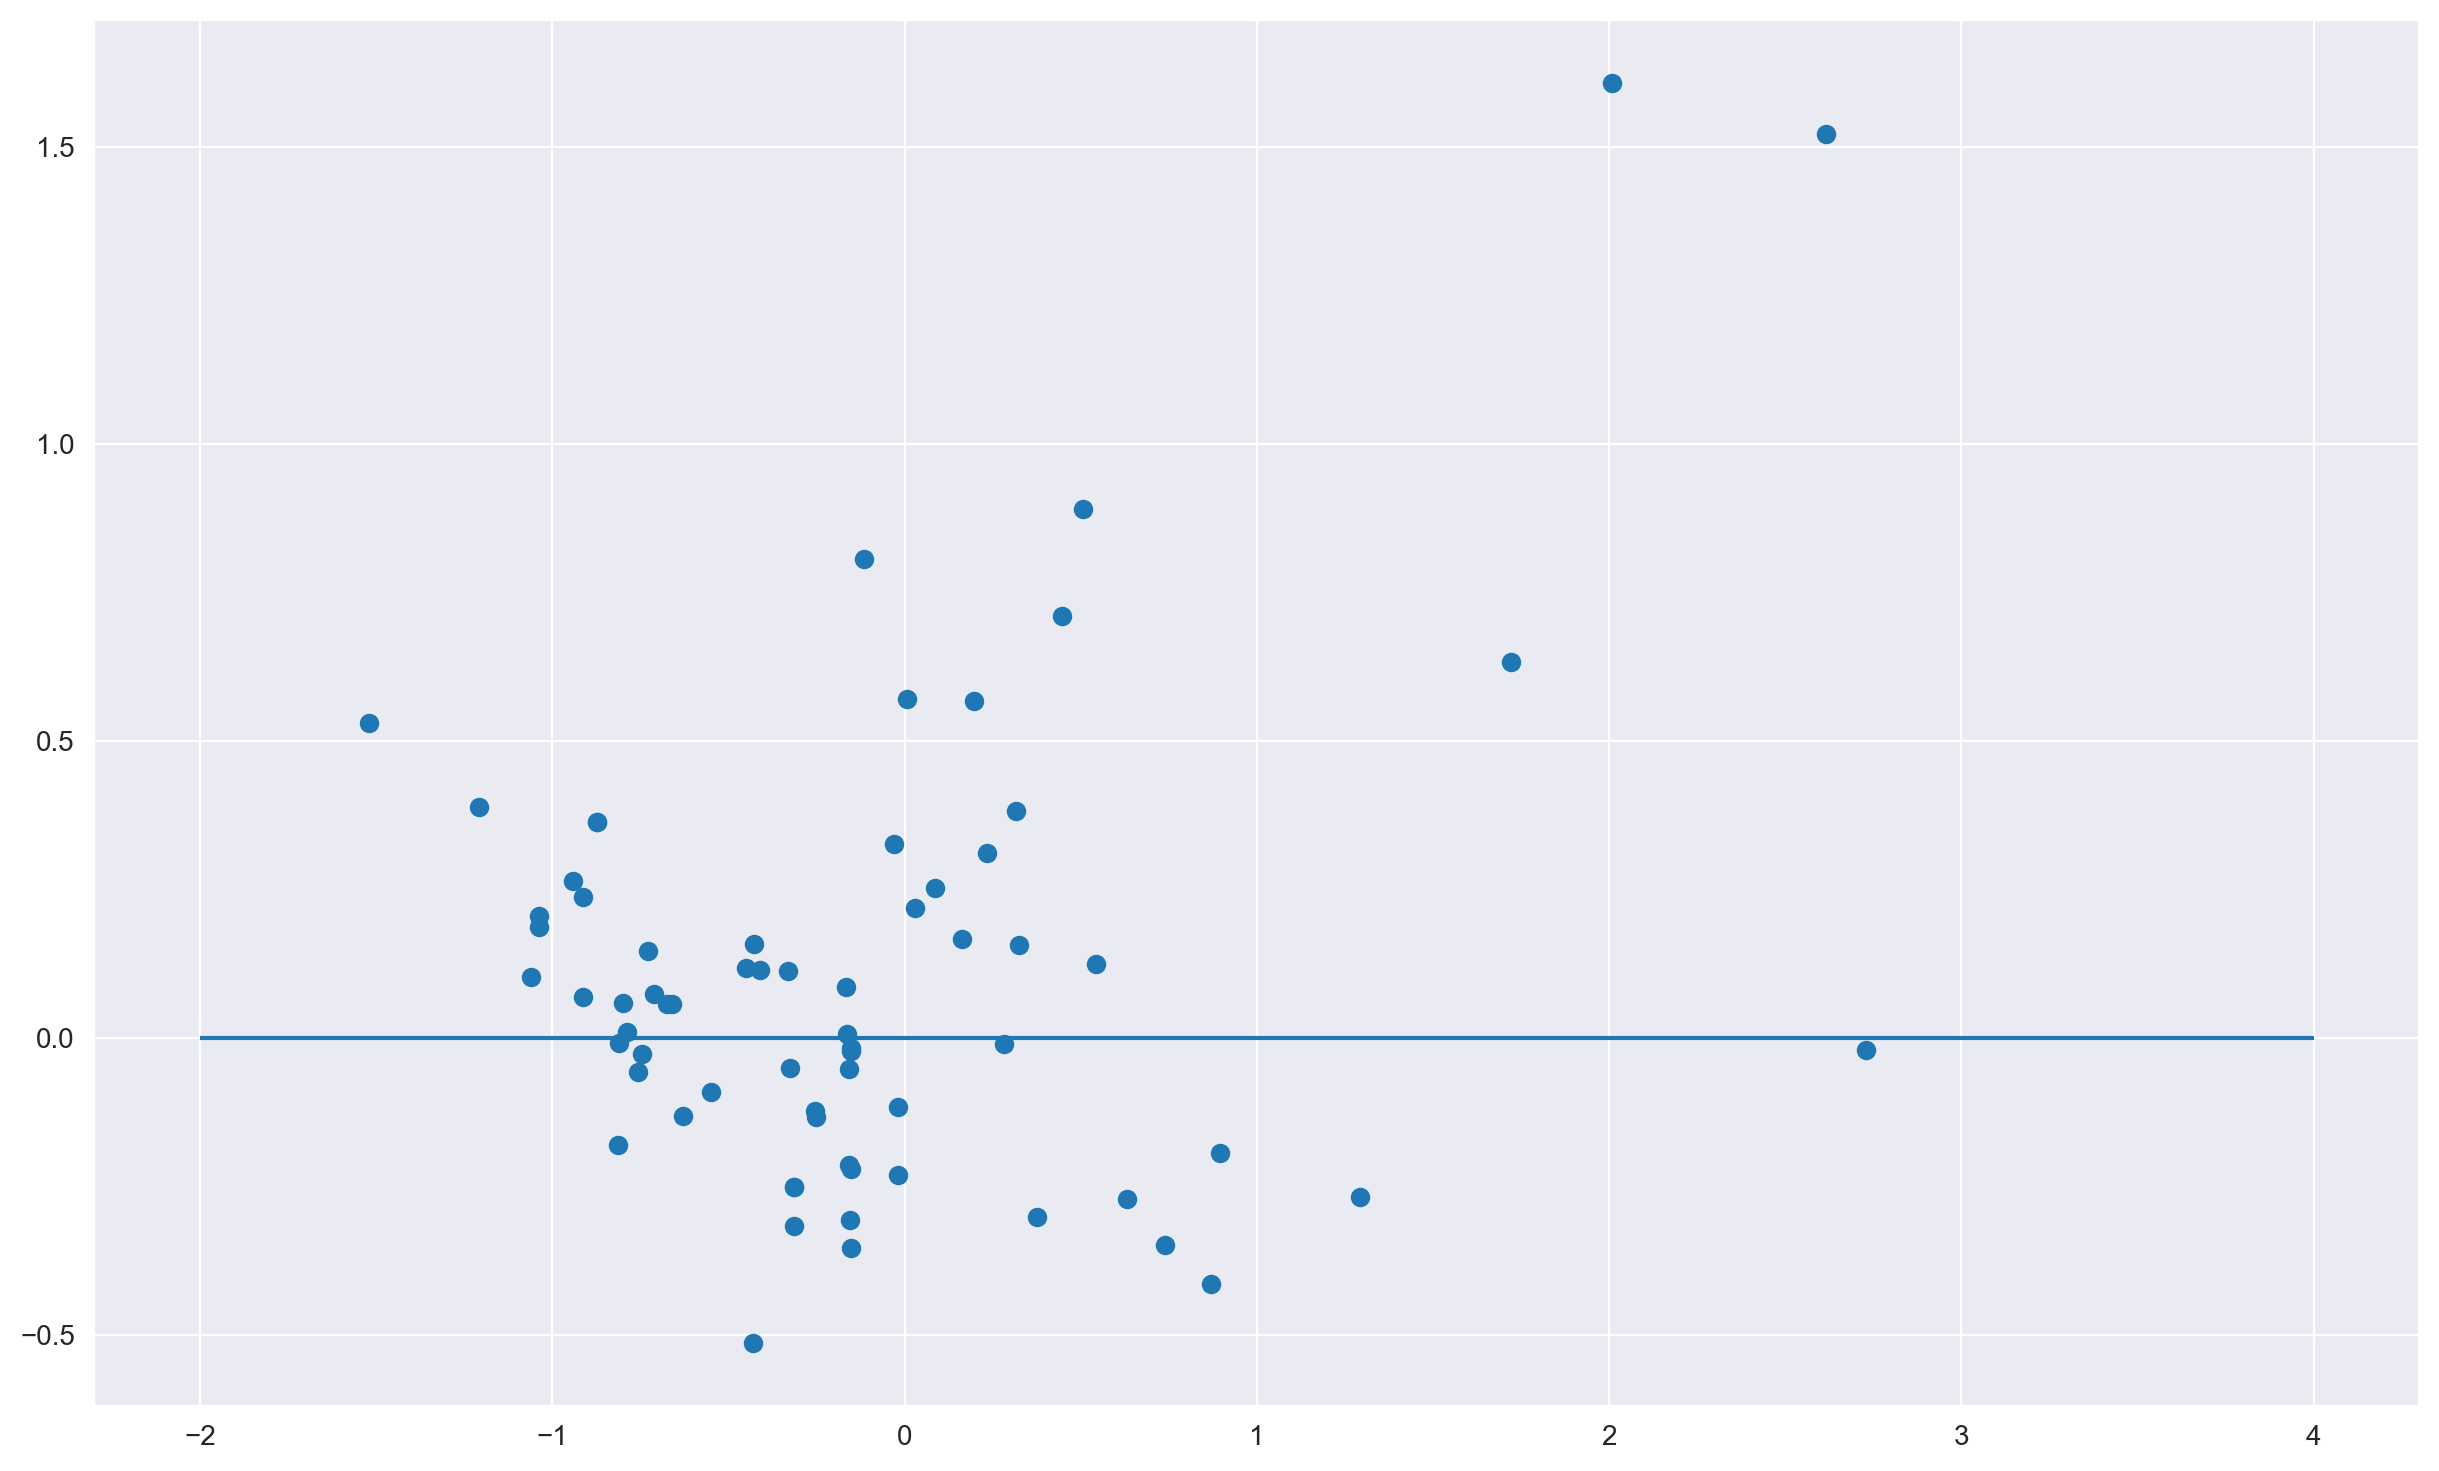

In [100]:
plt.scatter(y_pred, resid)
plt.hlines(0,-2,4)

----Anderson-Darling test ---- 
statistic: 1.1243, critical value of 5%: 0.7660


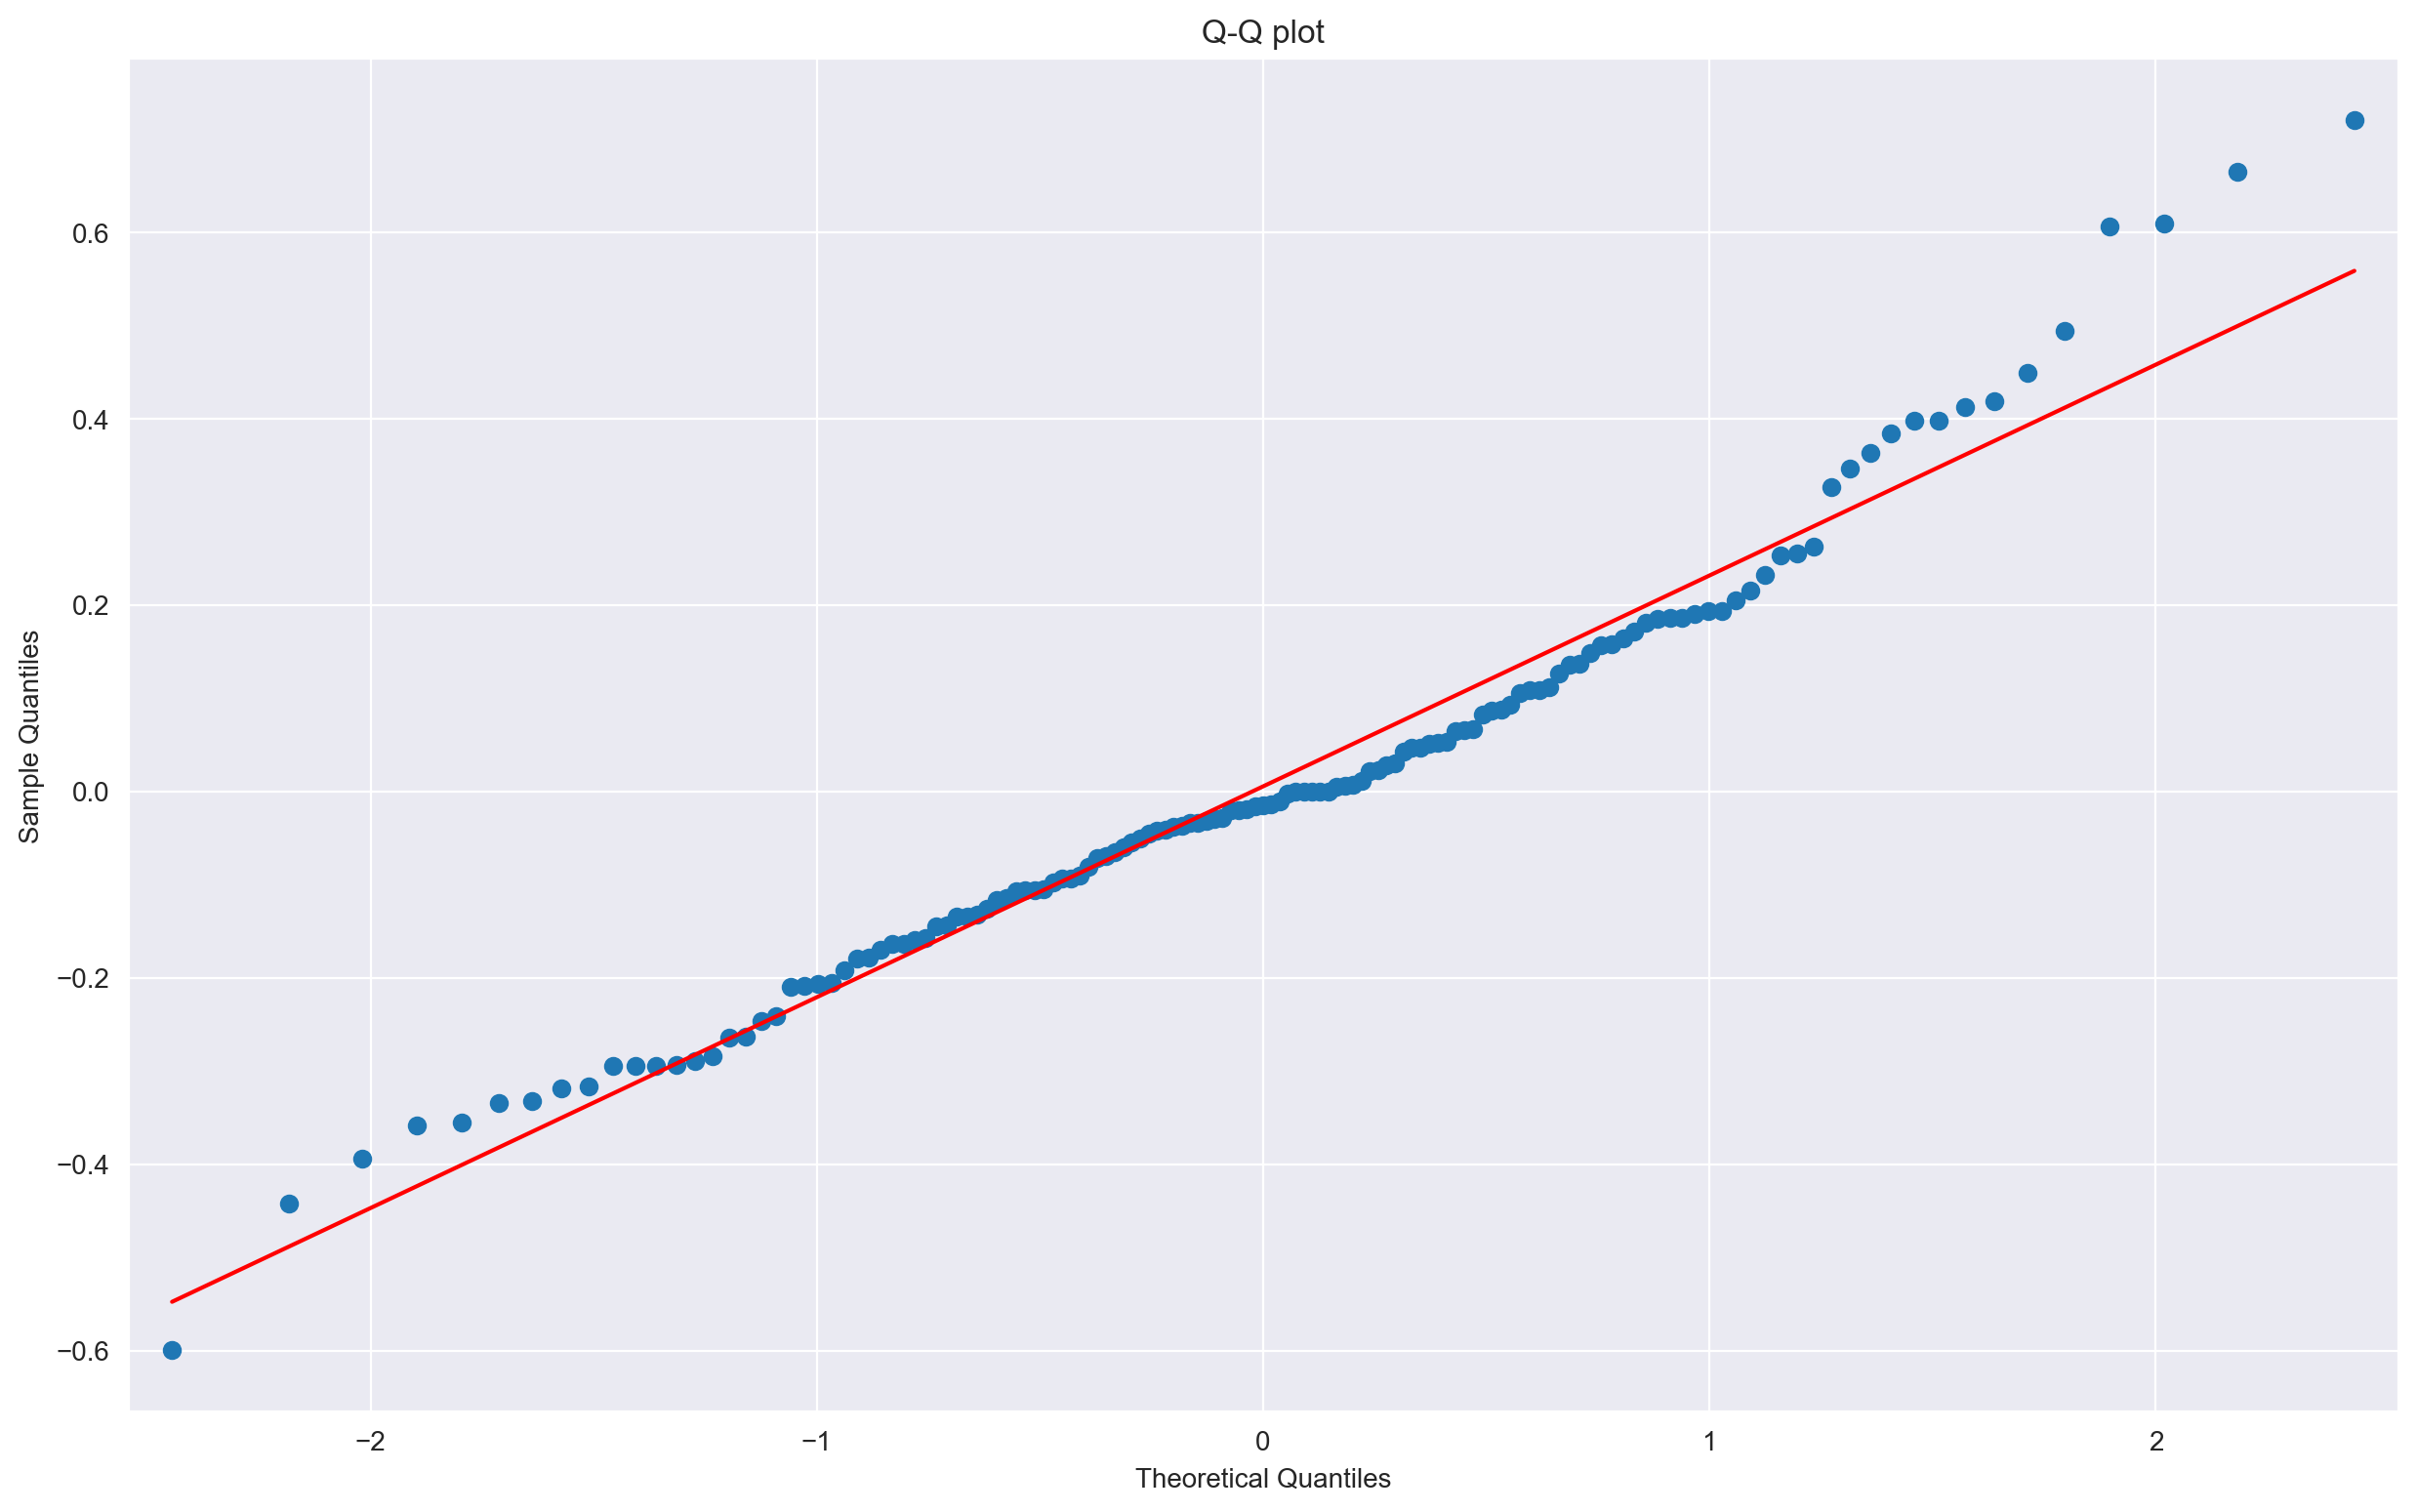

In [101]:
normality_of_residuals_test(lm)

**Evaluation of the test via the comparison of y_pred and y_test**

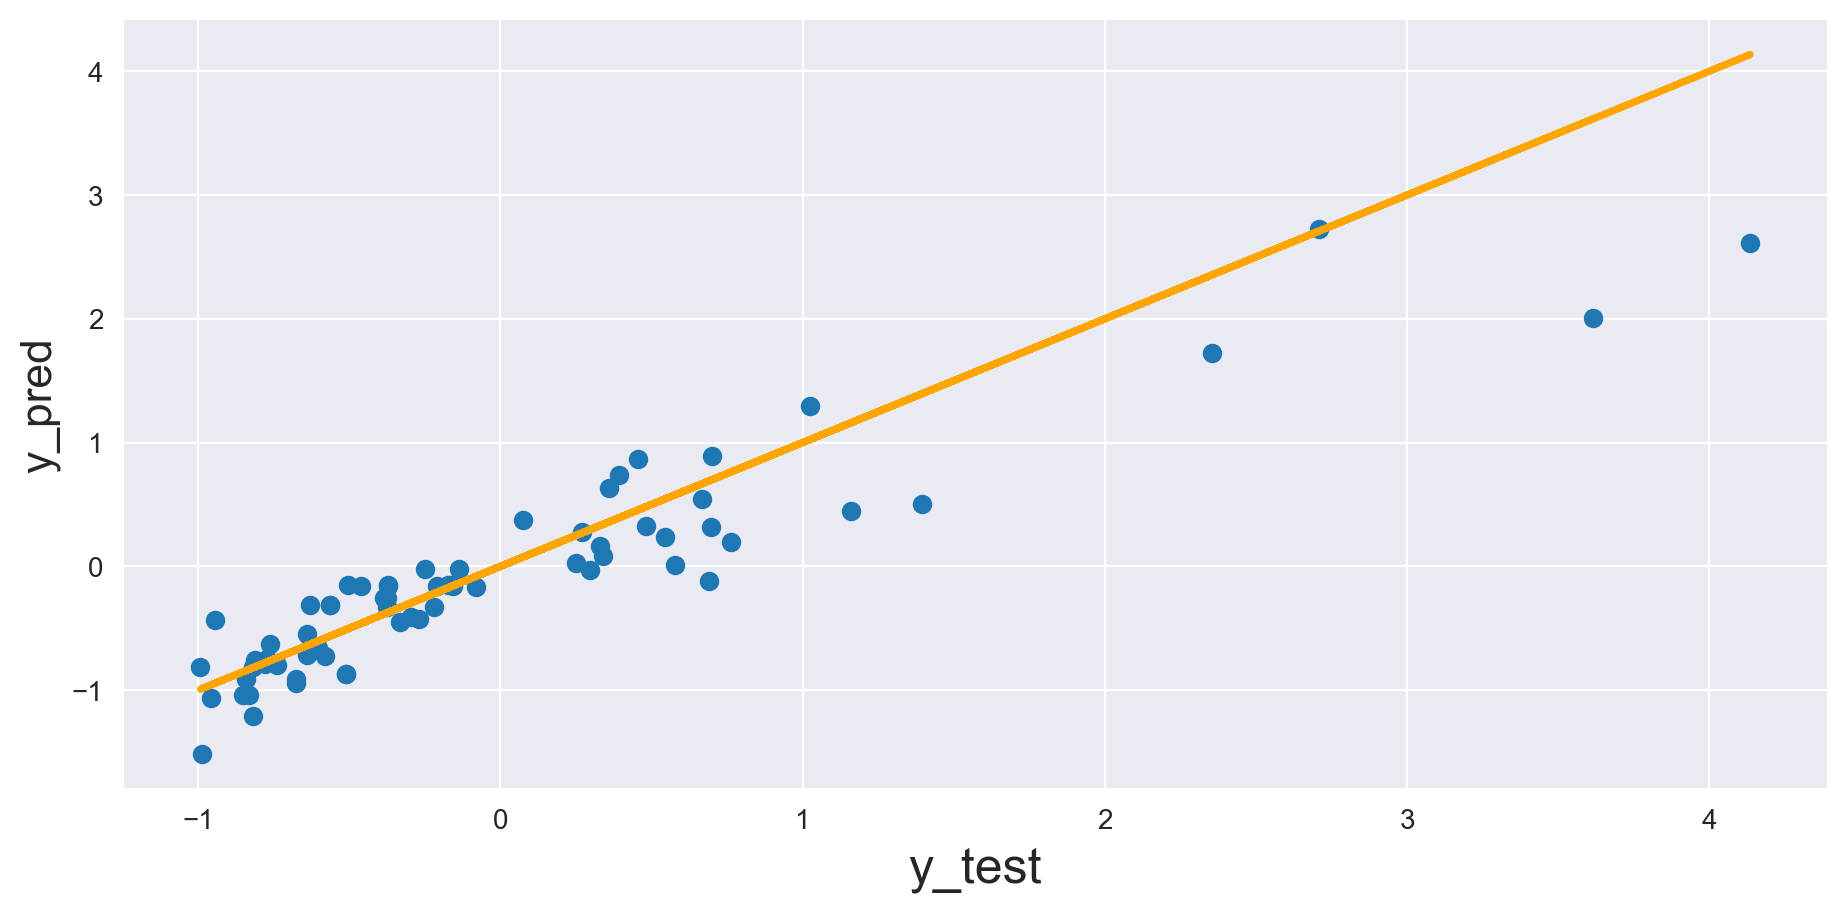

In [102]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#Regression Line function
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

# Final summary of the model

In [103]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8384409773853355

In [104]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              75.39
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                    7.97e-59
Time:                        06:25:03   Log-Likelihood:                          9.0980
No. Observations:                 137   AIC:                                      35.80
Df Residuals:                     110   BIC:                                      114.6
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------